In [1]:
import pandas as pd
import numpy as np
import os
import statsmodels.formula.api as sm
from sklearn.preprocessing import scale
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
os.chdir('C:\Apurva\Conservation Games\Games meta-analysis\Datasets\Data Gabon, Orkney, Madagascar and Kenya')
print(os.getcwd())

C:\Apurva\Conservation Games\Games meta-analysis\Datasets\Data Gabon, Orkney, Madagascar and Kenya


In [3]:
data = pd.read_csv('combined4.csv', index_col=0)
len(data)

4109

In [4]:
data.columns

Index(['Depend_on_others_4', 'Effects_on_others_4', 'Com_trust2_3',
       'Risk_social_1', 'Game_goal_2_1', 'Rel2_3', 'Trust_natpark_4',
       'Game_goal_4_3', 'primary_farming_1', 'Neg_wellb_4',
       ...
       'Education_1', 'RespHOH_3', 'Trust_govt_1', 'Rel1_2', 'Fut_Gen_3',
       'Depend_on_others_2', 'envProduction', 'Effects_on_next_gen_3',
       'Pos_wellb_1', 'secondary_priv_tour_2'],
      dtype='object', length=117)

In [5]:
np.unique([x[:-2] for x in data.columns.values])

array(['Age', 'Com_coord', 'Com_trust1', 'Com_trust2', 'Depend_on_others',
       'Education', 'Effects_on_next_gen', 'Effects_on_others', 'Fut_Gen',
       'Game', 'Game_goal_1', 'Game_goal_2', 'Game_goal_3', 'Game_goal_4',
       'Gender', 'Gov_resp', 'Neg_wellb', 'Pos_wellb', 'Rel1', 'Rel2',
       'Rel3', 'RespHOH', 'Risk_social', 'Treatmen', 'Trust_govt',
       'Trust_natpark', 'count', 'envProducti', 'primary_farming',
       'primary_priv_tour', 'secondary_farming', 'secondary_priv_tour',
       'subsi'], dtype='<U19')

In [6]:
for col in ['Age', 'Education', 'Gender', 'Com_coord', 'Com_trust1', 'Com_trust2', 'Depend_on_others',
           'Effects_on_next_gen', 'Effects_on_others', 'Fut_Gen', 'Game_goal_1', 'Game_goal_2', 'Game_goal_3', 'Game_goal_4',
           'Gov_resp', 'Neg_wellb', 'Pos_wellb', 'Risk_social', 'Trust_govt', 'Trust_natpark',
           'primary_farming', 'primary_priv_tour', 'secondary_farming', 'secondary_priv_tour']:
    data[col+'_mean'] = data[[col+'_1', col+'_2', col+'_3', col+'_4']].mean(axis=1)
    #data[col+'_std'] = data[[col+'_1', col+'_2', col+'_3', col+'_4']].std(axis=1)
    data[col+'_var'] = data[[col+'_1', col+'_2', col+'_3', col+'_4']].var(axis=1)
    data[col+'_min'] = data[[col+'_1', col+'_2', col+'_3', col+'_4']].min(axis=1)
    data[col+'_max'] = data[[col+'_1', col+'_2', col+'_3', col+'_4']].max(axis=1)

data['rel_mean'] = data[['Rel1_1', 'Rel2_1', 'Rel3_1', 'Rel1_2', 'Rel2_2', 'Rel3_2',
                       'Rel1_3', 'Rel2_3', 'Rel3_3', 'Rel1_4', 'Rel2_4', 'Rel3_4']].mean(axis=1)
data['rel_var'] = data[['Rel1_1', 'Rel2_1', 'Rel3_1', 'Rel1_2', 'Rel2_2', 'Rel3_2',
                       'Rel1_3', 'Rel2_3', 'Rel3_3', 'Rel1_4', 'Rel2_4', 'Rel3_4']].var(axis=1)
data['rel_min'] = data[['Rel1_1', 'Rel2_1', 'Rel3_1', 'Rel1_2', 'Rel2_2', 'Rel3_2',
                       'Rel1_3', 'Rel2_3', 'Rel3_3', 'Rel1_4', 'Rel2_4', 'Rel3_4']].min(axis=1)
data['rel_max'] = data[['Rel1_1', 'Rel2_1', 'Rel3_1', 'Rel1_2', 'Rel2_2', 'Rel3_2',
                       'Rel1_3', 'Rel2_3', 'Rel3_3', 'Rel1_4', 'Rel2_4', 'Rel3_4']].max(axis=1)

In [7]:
# Get one hot encoding of columns B
one_hot = pd.get_dummies(data['country'])
# Join the encoded df
data = pd.concat([data, one_hot], axis=1)

In [8]:
col_list = ['Age_mean', 'Age_var', 'Age_min', 'Age_max', 'Education_mean',
       'Education_var', 'Education_min', 'Education_max', 'Gender_mean',
       'Gender_var', 'Gender_min', 'Gender_max', 'Com_coord_mean',
       'Com_coord_var', 'Com_coord_min', 'Com_coord_max', 'Com_trust1_mean',
       'Com_trust1_var', 'Com_trust1_min', 'Com_trust1_max', 'Com_trust2_mean',
       'Com_trust2_var', 'Com_trust2_min', 'Com_trust2_max',
       'Depend_on_others_mean', 'Depend_on_others_var', 'Depend_on_others_min',
       'Depend_on_others_max', 'Effects_on_next_gen_mean',
       'Effects_on_next_gen_var', 'Effects_on_next_gen_min',
       'Effects_on_next_gen_max', 'Effects_on_others_mean',
       'Effects_on_others_var', 'Effects_on_others_min', 'Effects_on_others_max', 'Fut_Gen_mean',
       'Fut_Gen_var', 'Fut_Gen_min', 'Fut_Gen_max', 'Game_goal_1_mean',
       'Game_goal_1_var', 'Game_goal_1_min', 'Game_goal_1_max',
       'Game_goal_2_mean', 'Game_goal_2_var', 'Game_goal_2_min',
       'Game_goal_2_max', 'Game_goal_3_mean', 'Game_goal_3_var',
       'Game_goal_3_min', 'Game_goal_3_max', 'Game_goal_4_mean',
       'Game_goal_4_var', 'Game_goal_4_min', 'Game_goal_4_max',
       'Gov_resp_mean', 'Gov_resp_var', 'Gov_resp_min', 'Gov_resp_max',
       'Neg_wellb_mean', 'Neg_wellb_var', 'Neg_wellb_min', 'Neg_wellb_max',
       'Pos_wellb_mean', 'Pos_wellb_var', 'Pos_wellb_min', 'Pos_wellb_max',
       'Risk_social_mean', 'Risk_social_var', 'Risk_social_min',
       'Risk_social_max', 'Trust_govt_mean', 'Trust_govt_var',
       'Trust_govt_min', 'Trust_govt_max', 'Trust_natpark_mean',
       'Trust_natpark_var', 'Trust_natpark_min', 'Trust_natpark_max',
       'primary_farming_mean', 'primary_farming_var', 'primary_farming_min',
       'primary_farming_max', 'primary_priv_tour_mean',
       'primary_priv_tour_var', 'primary_priv_tour_min',
       'primary_priv_tour_max', 'secondary_farming_mean',
       'secondary_farming_var', 'secondary_farming_min',
       'secondary_farming_max', 'secondary_priv_tour_mean',
       'secondary_priv_tour_var', 'secondary_priv_tour_min',
       'secondary_priv_tour_max', 'rel_mean', 'rel_var', 'rel_min', 'rel_max', 'subsidy', 'envProduction']
for col in col_list:
    data['z_'+col] = data.groupby('country')[col].transform(lambda x: scale(x.astype(float)))

In [9]:
data

Depend_on_others_4  Effects_on_others_4  Com_trust2_3  Risk_social_1  \
0                    0.0                 0.33           1.0            1.0   
1                    0.0                 0.33           1.0            1.0   
3                    0.0                 0.33           1.0            1.0   
4                    0.0                 0.33           1.0            1.0   
5                    0.0                 0.33           1.0            1.0   
...                  ...                  ...           ...            ...   
5096                 0.0                 0.00           1.0            1.0   
5097                 0.0                 0.00           1.0            1.0   
5098                 0.0                 0.00           1.0            1.0   
5102                 0.0                 0.00           1.0            1.0   
5103                 0.0                 0.00           1.0            1.0   

      Game_goal_2_1  Rel2_3  Trust_natpark_4  Game_goal_4_3  \
0                 0    0.33              0.0              1   
1                 0    0.33              0.0              1   
3                 0    0.33              0.0              1   
4                 0    0.33              0.0              1   
5                 0    0.33              0.0              1   
...             ...     ...              ...            ...   
5096              0    0.66              1.0              1   
5097              0    0.66              1.0              1   
5098              0    0.66              1.0              1   
5102              0    0.66              1.0              1   
5103              0    0.66              1.0              1   

      primary_farming_1  Neg_wellb_4  ...  z_secondary_priv_tour_mean  \
0                     1          1.0  ...                   -0.689125   
1                     1          1.0  ...                   -0.689125   
3                     1          1.0  ...                   -0.689125   
4                     1          1.0  ...                   -0.689125   
5                     1          1.0  ...                   -0.689125   
...                 ...          ...  ...                         ...   
5096                  1          0.0  ...                   -0.346509   
5097                  1          0.0  ...                   -0.346509   
5098                  1          0.0  ...                   -0.346509   
5102                  1          0.0  ...                   -0.346509   
5103                  1          0.0  ...                   -0.346509   

      z_secondary_priv_tour_var  z_secondary_priv_tour_min  \
0                     -0.730877                          0   
1                     -0.730877                          0   
3                     -0.730877                          0   
4                     -0.730877                          0   
5                     -0.730877                          0   
...                         ...                        ...   
5096                  -0.346509                          0   
5097                  -0.346509                          0   
5098                  -0.346509                          0   
5102                  -0.346509                          0   
5103                  -0.346509                          0   

      z_secondary_priv_tour_max  z_rel_mean  z_rel_var  z_rel_min  z_rel_max  \
0                     -0.737961   -2.866814   1.078289  -1.678755   0.000000   
1                     -0.737961   -2.866814   1.078289  -1.678755   0.000000   
3                     -0.737961   -2.866814   1.078289  -1.678755   0.000000   
4                     -0.737961   -2.866814   1.078289  -1.678755   0.000000   
5                     -0.737961   -2.866814   1.078289  -1.678755   0.000000   
...                         ...         ...        ...        ...        ...   
5096                  -0.346509    0.361201  -0.760521   0.898441  -0.717692   
5097                  -0.346509    0.361201  -0.76

In [10]:
exceptions = ['Game_goal_1_mean',
       'Game_goal_1_var', 'Game_goal_1_min', 'Game_goal_1_max',
       'Game_goal_2_mean', 'Game_goal_2_var', 'Game_goal_2_min',
       'Game_goal_2_max', 'Game_goal_3_mean', 'Game_goal_3_var',
       'Game_goal_3_min', 'Game_goal_3_max', 'Game_goal_4_mean',
       'Game_goal_4_var', 'Game_goal_4_min', 'Game_goal_4_max',
             'primary_priv_tour_mean',
       'primary_priv_tour_var', 'primary_priv_tour_min',
       'primary_priv_tour_max','secondary_priv_tour_mean',
       'secondary_priv_tour_var', 'secondary_priv_tour_min',
       'secondary_priv_tour_max']

In [11]:
for col in exceptions:
    print(col, data[col].min(), data[col].max())

Game_goal_1_mean 0.25 0.25
Game_goal_1_var 0.25 0.25
Game_goal_1_min 0 0
Game_goal_1_max 1 1
Game_goal_2_mean 0.25 0.25
Game_goal_2_var 0.25 0.25
Game_goal_2_min 0 0
Game_goal_2_max 1 1
Game_goal_3_mean 0.0 0.25
Game_goal_3_var 0.0 0.25
Game_goal_3_min 0 0
Game_goal_3_max 0 1
Game_goal_4_mean 0.0 0.25
Game_goal_4_var 0.0 0.25
Game_goal_4_min 0 0
Game_goal_4_max 0 1
primary_priv_tour_mean 0.0 0.5
primary_priv_tour_var 0.0 0.3333333333333333
primary_priv_tour_min 0 0
primary_priv_tour_max 0 1
secondary_priv_tour_mean 0.0 0.75
secondary_priv_tour_var 0.0 0.3333333333333333
secondary_priv_tour_min 0 0
secondary_priv_tour_max 0 1


In [12]:
explanatory_var = ['z_' + x for x in ['Age_mean', 'Age_var', 'Age_min', 'Age_max', 'Education_mean',
       'Education_var', 'Education_min', 'Education_max', 'Gender_mean',
       'Gender_var', 'Gender_min', 'Gender_max', 'Com_coord_mean',
       'Com_coord_var', 'Com_coord_min', 'Com_coord_max', 'Com_trust1_mean',
       'Com_trust1_var', 'Com_trust1_min', 'Com_trust1_max', 'Com_trust2_mean',
       'Com_trust2_var', 'Com_trust2_min', 'Com_trust2_max',
       'Depend_on_others_mean', 'Depend_on_others_var', 'Depend_on_others_min',
       'Depend_on_others_max', 'Effects_on_next_gen_mean',
       'Effects_on_next_gen_var', 'Effects_on_next_gen_min',
       'Effects_on_next_gen_max', 'Effects_on_others_mean',
       'Effects_on_others_var', 'Effects_on_others_min', 'Effects_on_others_max', 'Fut_Gen_mean',
       'Fut_Gen_var', 'Fut_Gen_min', 'Fut_Gen_max', 
       'Gov_resp_mean', 'Gov_resp_var', 'Gov_resp_min', 'Gov_resp_max',
       'Neg_wellb_mean', 'Neg_wellb_var', 'Neg_wellb_min', 'Neg_wellb_max',
       'Pos_wellb_mean', 'Pos_wellb_var', 'Pos_wellb_min', 'Pos_wellb_max',
       'Risk_social_mean', 'Risk_social_var', 'Risk_social_min',
       'Risk_social_max', 'Trust_govt_mean', 'Trust_govt_var',
       'Trust_govt_min', 'Trust_govt_max', 'Trust_natpark_mean',
       'Trust_natpark_var', 'Trust_natpark_min', 'Trust_natpark_max',
       'primary_farming_mean', 'primary_farming_var', 'primary_farming_min',
       'primary_farming_max',  'secondary_farming_mean',
       'secondary_farming_var', 'secondary_farming_min',
       'secondary_farming_max', 'rel_mean', 'rel_var', 'rel_min', 'rel_max', 'subsidy']] #+ ['cambodia', 'gabon', 'orkney', 'tanzania', 'vietnam', 'KEN', 'MAD']

predictor_var = 'z_envProduction'

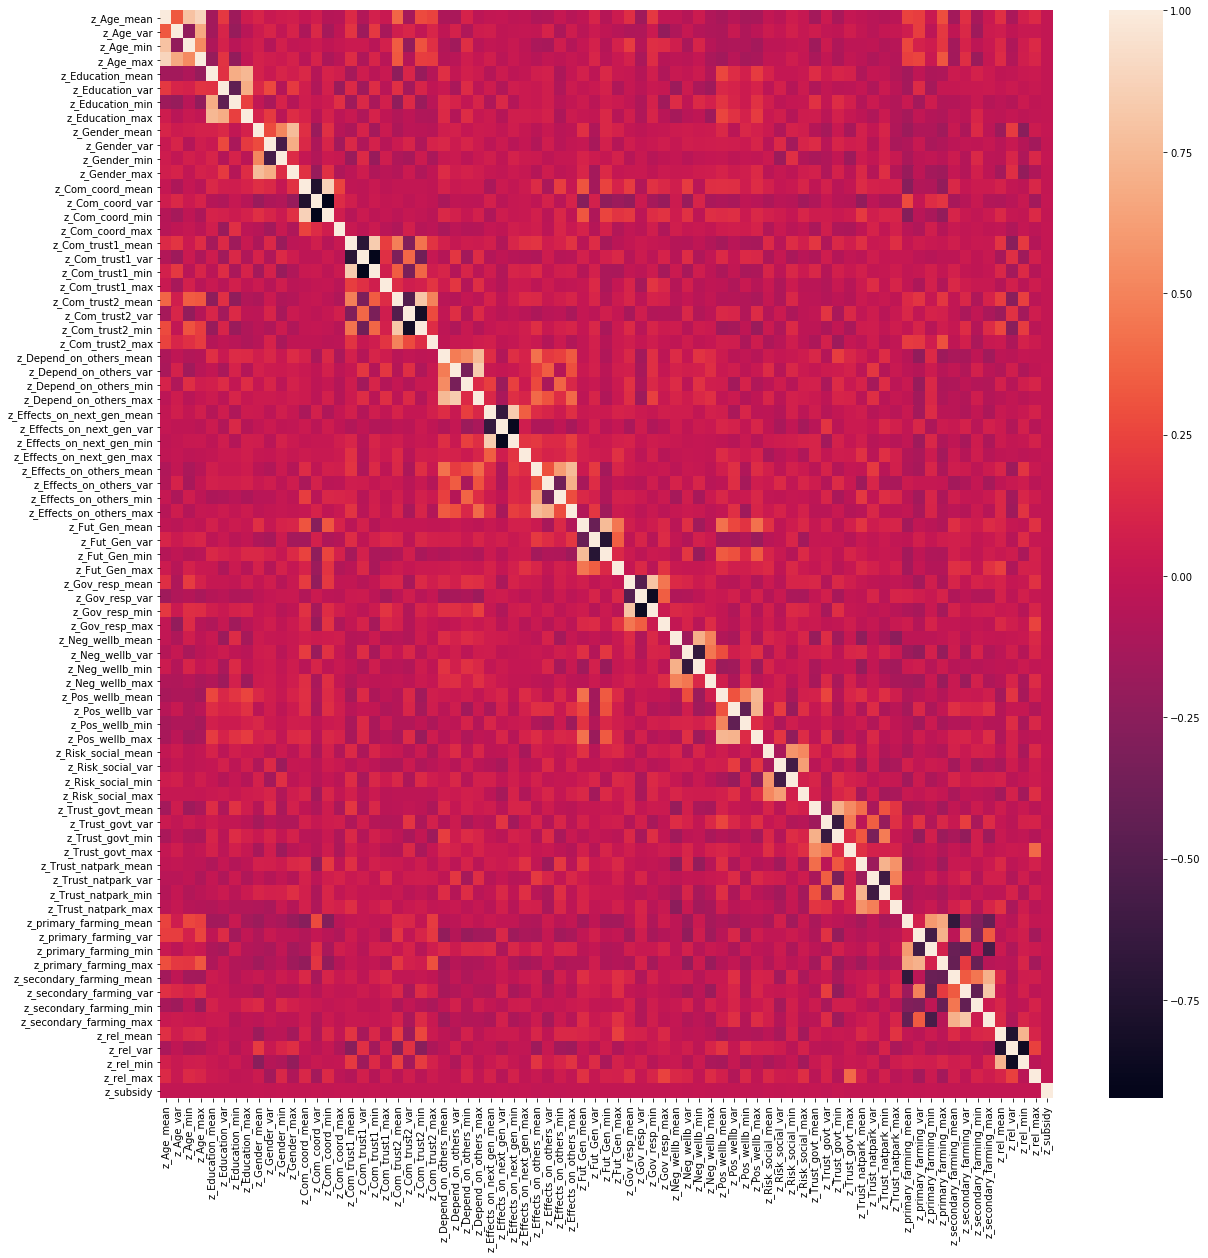

In [13]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(data[explanatory_var].corr(), ax=ax)

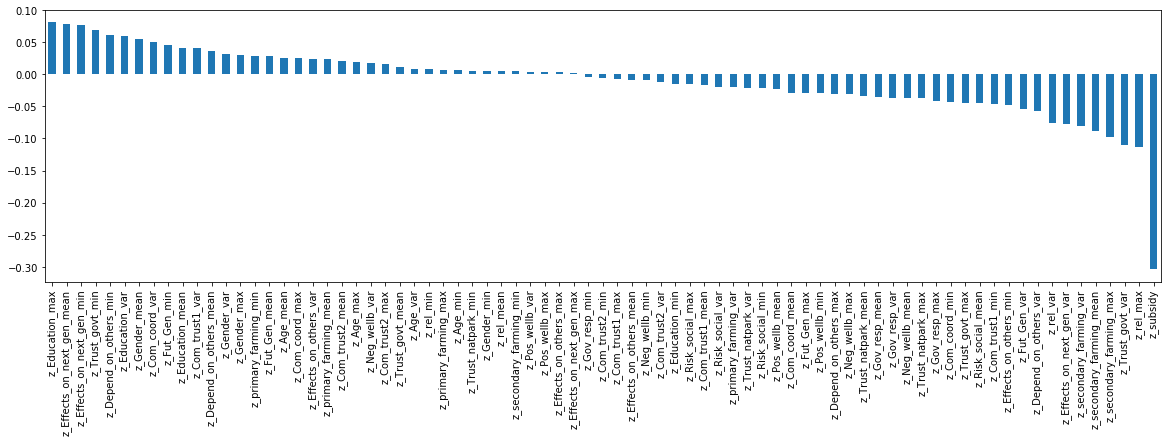

In [14]:
data[explanatory_var+[predictor_var]].corr()['z_envProduction'].sort_values(ascending=False)[1:].plot(kind='bar', figsize=(20,5))

In [15]:
data[explanatory_var].corr().unstack().sort_values(ascending=False)[17:]

z_Risk_social_max          z_Risk_social_max            1.000000
z_Trust_govt_var           z_Trust_govt_var             1.000000
z_Fut_Gen_var              z_Fut_Gen_var                1.000000
z_Trust_govt_min           z_Trust_govt_min             1.000000
z_rel_var                  z_rel_var                    1.000000
                                                          ...   
z_Effects_on_next_gen_var  z_Effects_on_next_gen_min   -0.878390
z_Com_trust1_var           z_Com_trust1_min            -0.901054
z_Com_trust1_min           z_Com_trust1_var            -0.901054
z_Com_coord_var            z_Com_coord_min             -0.922801
z_Com_coord_min            z_Com_coord_var             -0.922801
Length: 5912, dtype: float64

In [16]:
print(len(data))
data.drop_duplicates(inplace=True)
print(len(data))

4109
3738


In [17]:
formula = predictor_var + ' ~ '
for var in explanatory_var:
    formula += var + ' + '
formula = formula[:-3]

In [18]:
model = sm.ols(formula, data=data)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        z_envProduction   R-squared:                       0.219
Model:                            OLS   Adj. R-squared:                  0.203
Method:                 Least Squares   F-statistic:                     13.35
Date:                Tue, 02 Mar 2021   Prob (F-statistic):          1.43e-143
Time:                        09:33:21   Log-Likelihood:                -4833.8
No. Observations:                3738   AIC:                             9824.
Df Residuals:                    3660   BIC:                         1.031e+04
Df Model:                          77                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

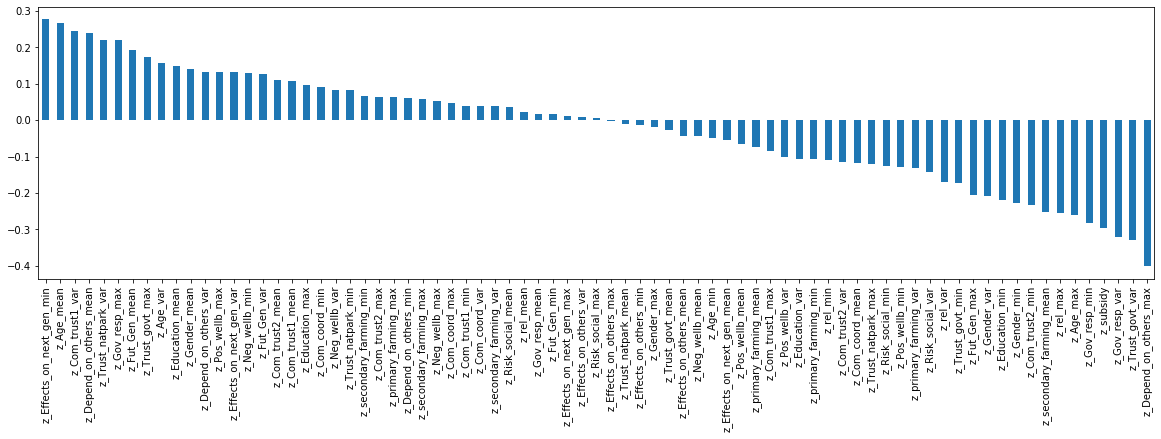

In [19]:
# plot coefficients
plt.figure(figsize=(20,5))
results.params.iloc[1:].sort_values(ascending=False).plot(kind='bar')

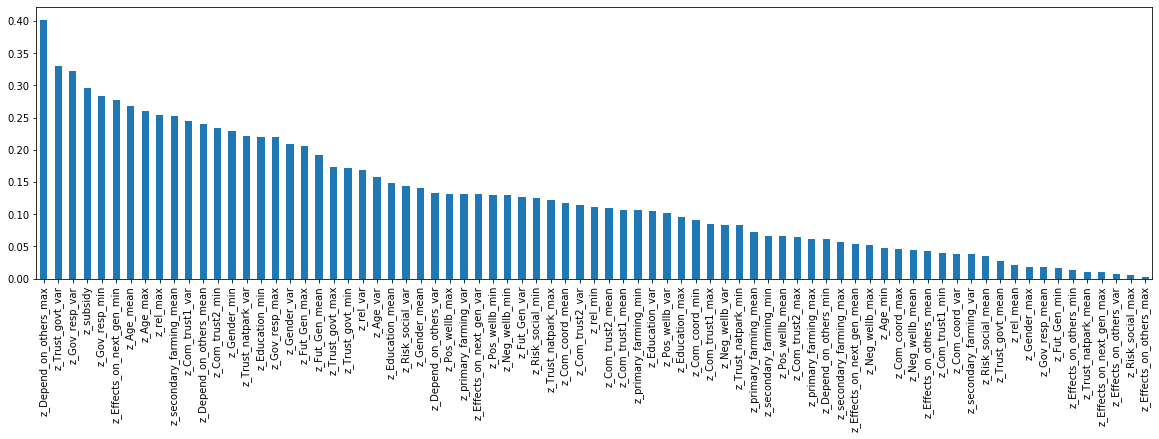

In [20]:
# plot absolute coefficients
plt.figure(figsize=(20,5))
results.params.iloc[1:].abs().sort_values(ascending=False).plot(kind='bar')

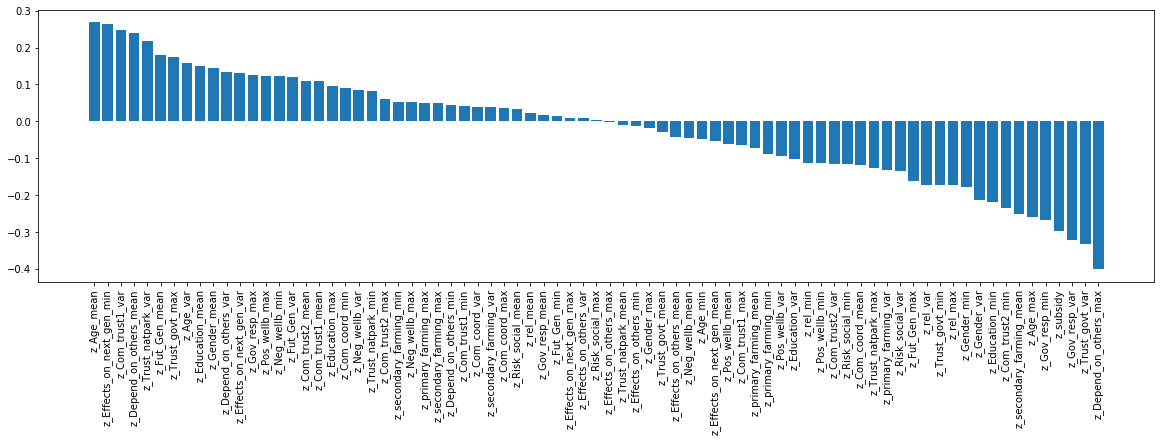

In [21]:
# plot beta coefficients
beta_coef = []
for var in results.params.index.values[1:]:
    beta_coef.append(results.params[var]*(data[var].std(ddof=0)/data['z_envProduction'].std(ddof=0)))
beta_coef = pd.DataFrame({'params':results.params.index.values[1:], 'coefs':beta_coef}).sort_values('coefs', ascending=False)
plt.figure(figsize=(20,5))
plt.bar('params', 'coefs', data=beta_coef)
plt.xticks(rotation=90)
plt.show()

In [22]:
# plot likelihoods
#plt.figure(figsize=(20,5))
#np.exp(results.params.iloc[1:].normalize()).sort_values(ascending=False).plot(kind='bar')

In [23]:
orig_r2 = results.rsquared
for var in explanatory_var:
    temp_explanatory_var = explanatory_var.copy()
    temp_explanatory_var.remove(var)
    formula = predictor_var + ' ~ '
    for temp_var in temp_explanatory_var:
        formula += temp_var + ' + '
    formula = formula[:-3]
    temp_model = sm.ols(formula, data=data).fit()
    print(var, temp_model.rsquared-results.rsquared)

z_Age_mean -0.002636988209875901
z_Age_var -0.0013217272815809755
z_Age_min -0.00012419522717310727
z_Age_max -0.0018219171519223698
z_Education_mean -0.0016920119567264136
z_Education_var -0.0007049973522604835
z_Education_min -0.0044112499337113364
z_Education_max -0.00046367249414647205
z_Gender_mean -0.0025082909291495037
z_Gender_var -0.00184976722801089
z_Gender_min -0.00211616156219141
z_Gender_max -2.3077792891457172e-05
z_Com_coord_mean -0.0015476694648680622
z_Com_coord_var -7.827038028496158e-05
z_Com_coord_min -0.0003047620610223678
z_Com_coord_max -0.0004539255661908381
z_Com_trust1_mean -0.0012531544514500226
z_Com_trust1_var -0.0030558443710461125
z_Com_trust1_min -6.855506431446834e-05
z_Com_trust1_max -0.0014229548894216792
z_Com_trust2_mean -0.0009580380374754061
z_Com_trust2_var -0.0009737488875242173
z_Com_trust2_min -0.00249908832241319
z_Com_trust2_max -0.0007451338103691141
z_Depend_on_others_mean -0.005815828065843465
z_Depend_on_others_var -0.000870524048236731

In [24]:
"""from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

x = StandardScaler().fit_transform(data[explanatory_var])
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data=principalComponents, columns=['principal component 1', 'principal component 2'])

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
ax.scatter(principalDf.loc[:, 'principal component 1'],
           principalDf.loc[:, 'principal component 2'],
           c = data[predictor_var_1], s = 10, cmap='Blues')
ax.grid()"""

"from sklearn.preprocessing import StandardScaler\nfrom sklearn.decomposition import PCA\n\nx = StandardScaler().fit_transform(data[explanatory_var])\npca = PCA(n_components=2)\nprincipalComponents = pca.fit_transform(x)\nprincipalDf = pd.DataFrame(data=principalComponents, columns=['principal component 1', 'principal component 2'])\n\nfig = plt.figure(figsize = (8,8))\nax = fig.add_subplot(1,1,1) \nax.set_xlabel('Principal Component 1', fontsize = 15)\nax.set_ylabel('Principal Component 2', fontsize = 15)\nax.set_title('2 component PCA', fontsize = 20)\nax.scatter(principalDf.loc[:, 'principal component 1'],\n           principalDf.loc[:, 'principal component 2'],\n           c = data[predictor_var_1], s = 10, cmap='Blues')\nax.grid()"

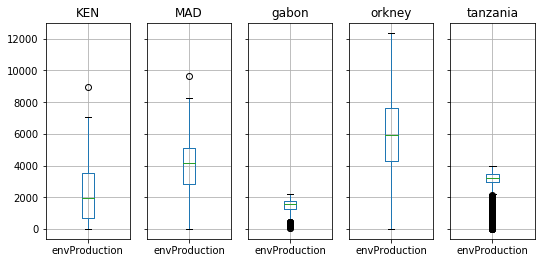

In [25]:
data[['envProduction', 'country']].groupby('country').boxplot(figsize=(12,4), layout=(1,7))
plt.show()

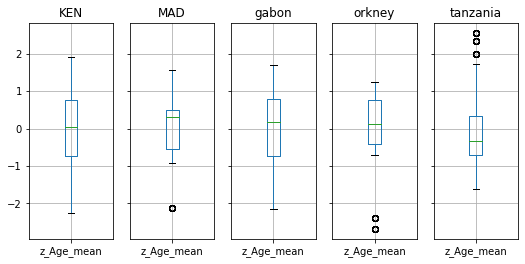

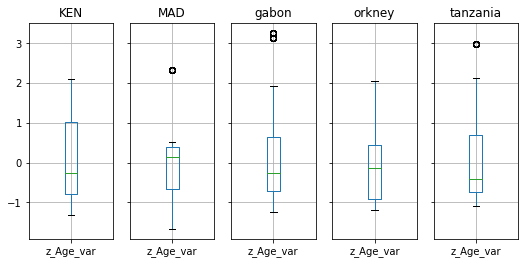

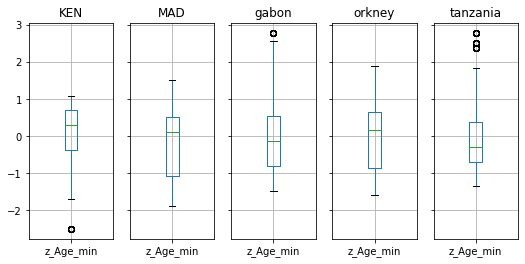

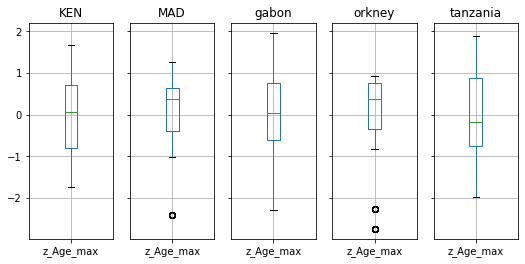

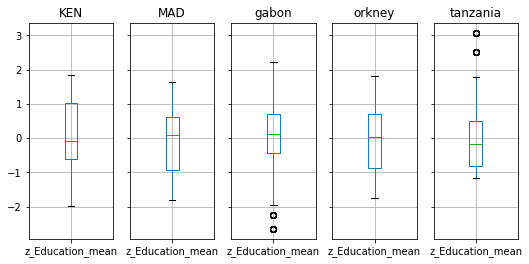

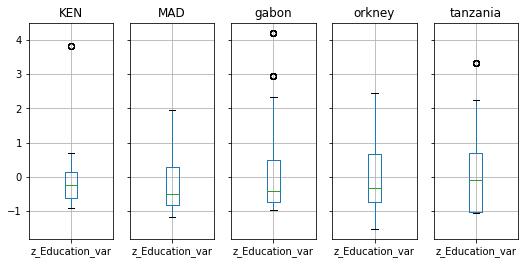

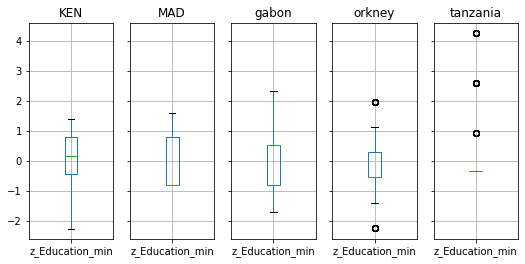

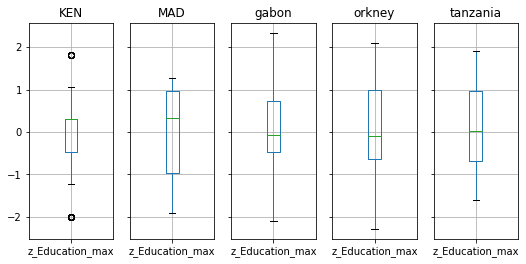

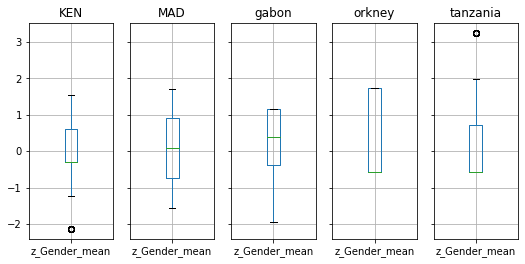

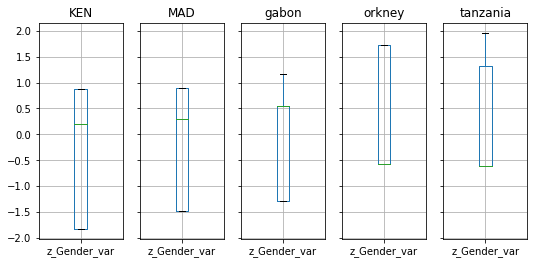

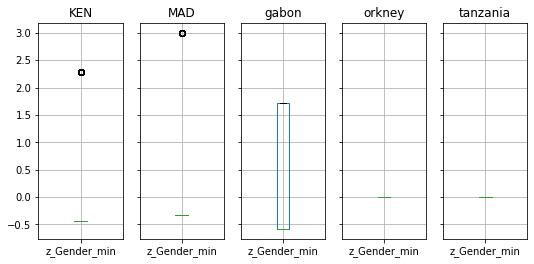

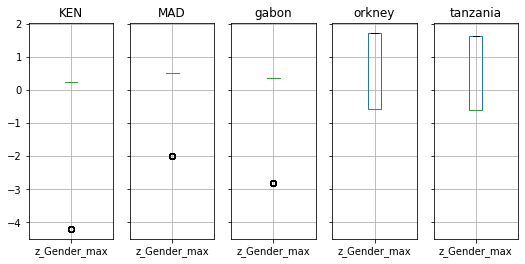

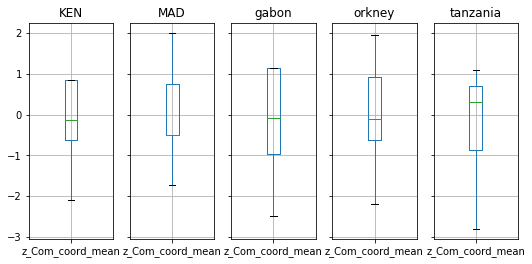

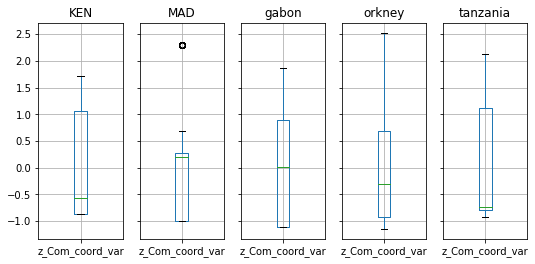

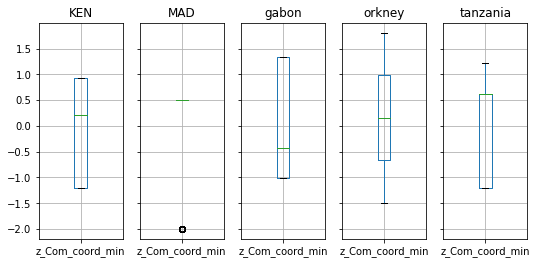

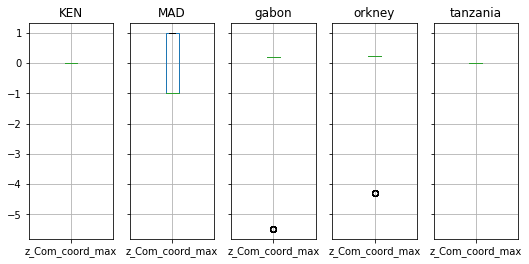

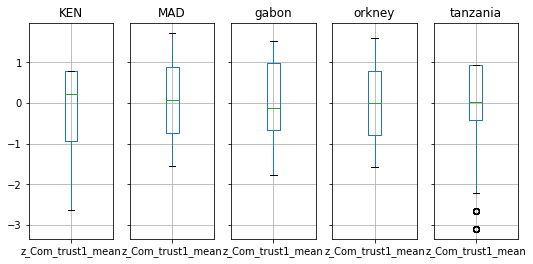

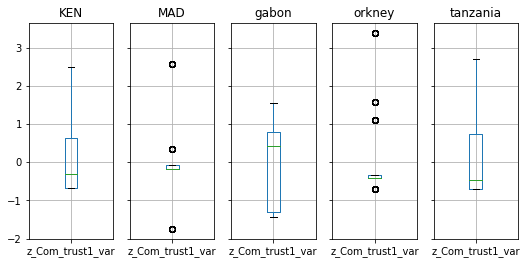

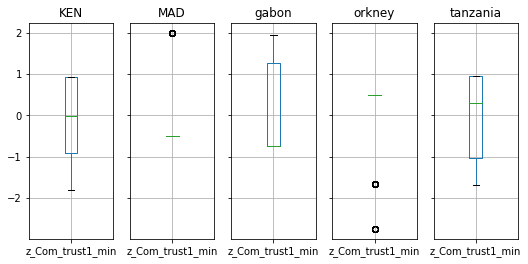

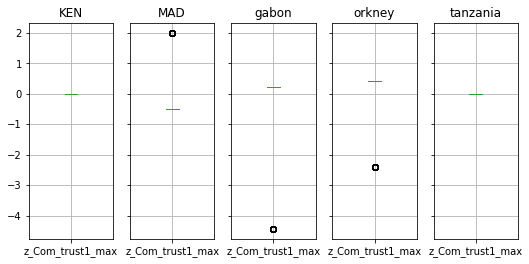

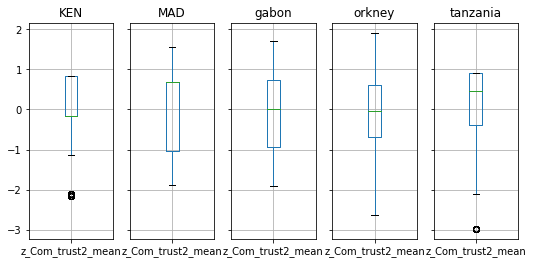

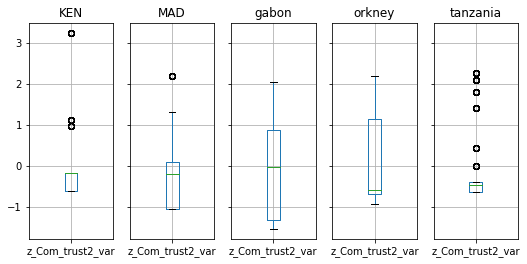

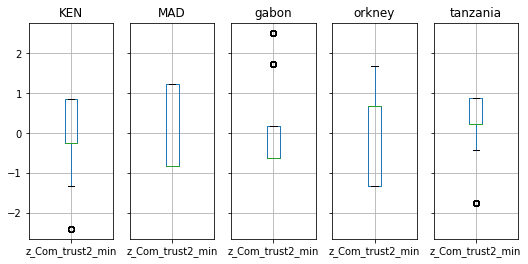

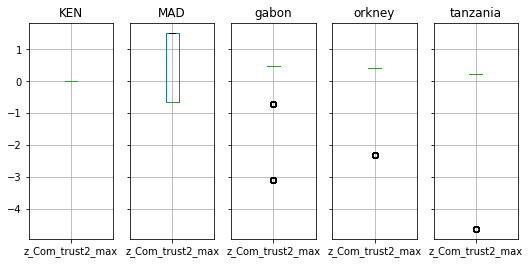

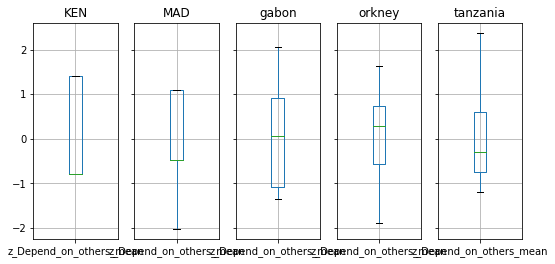

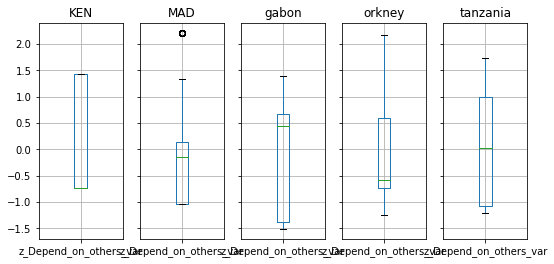

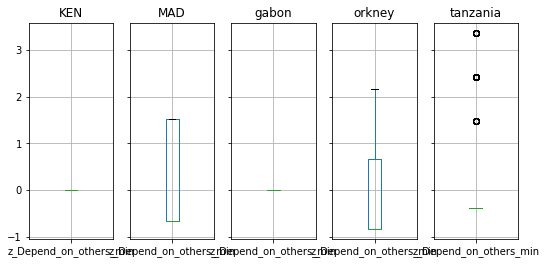

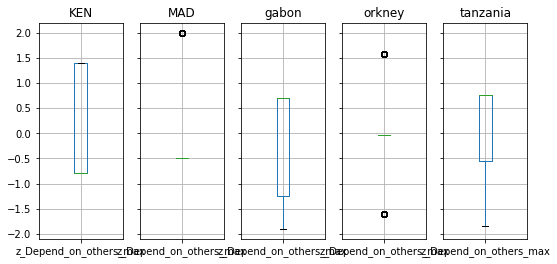

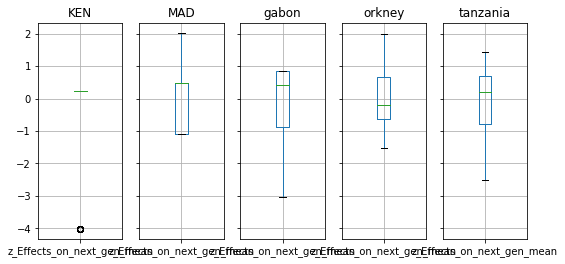

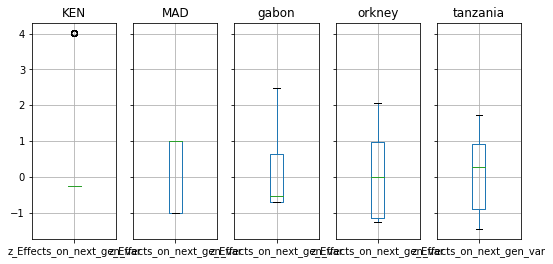

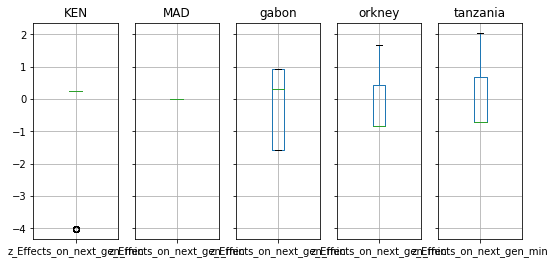

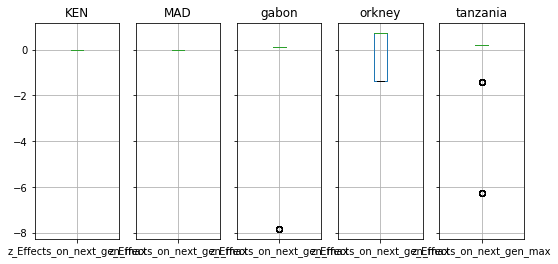

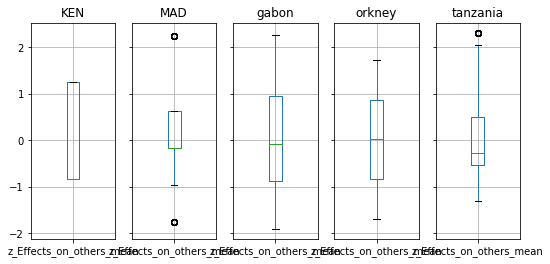

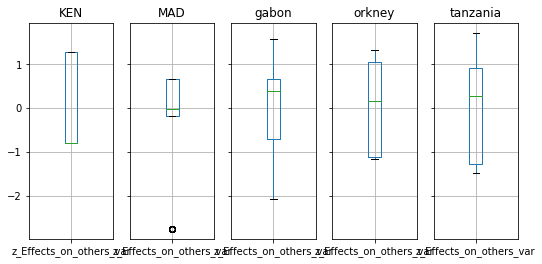

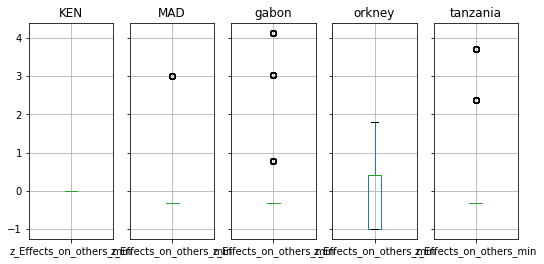

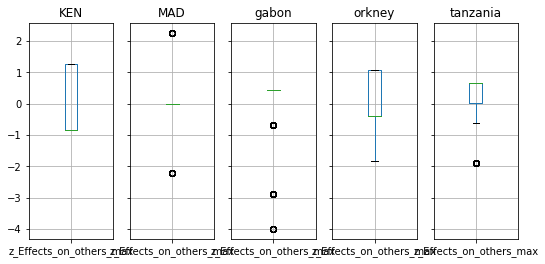

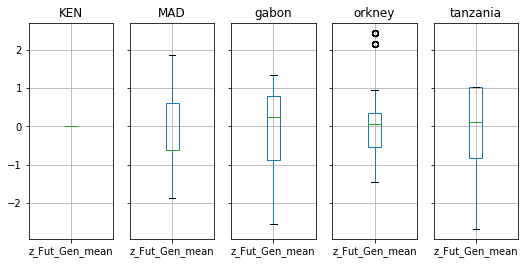

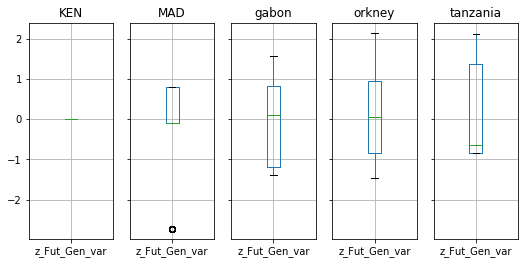

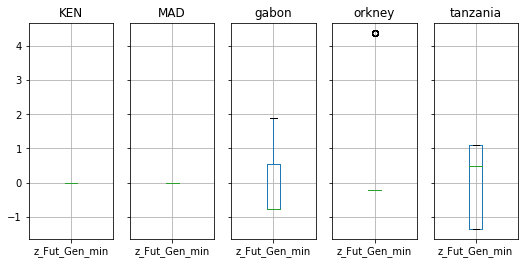

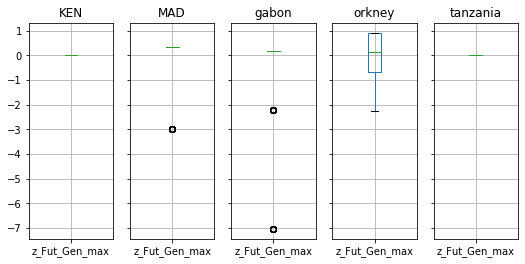

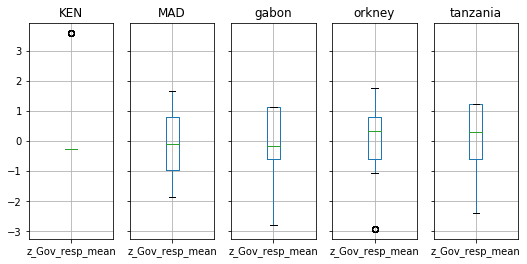

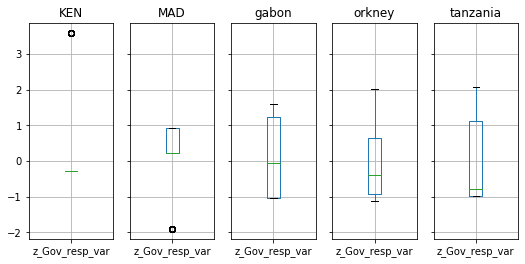

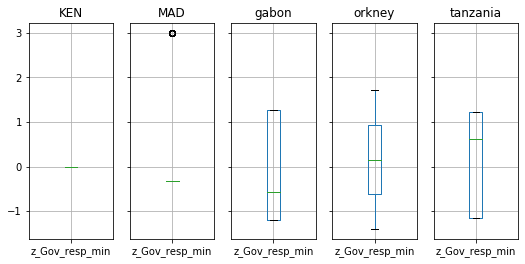

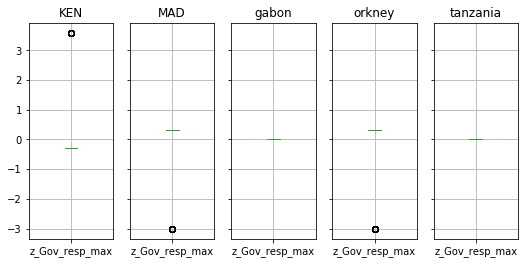

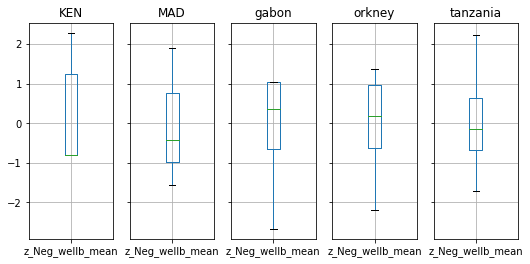

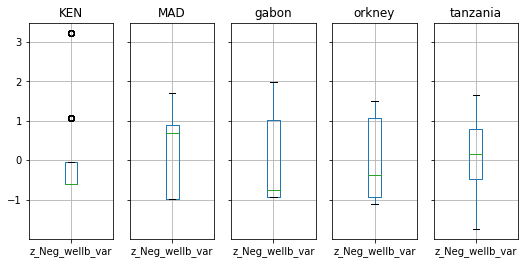

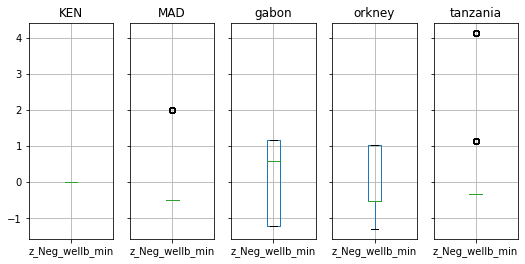

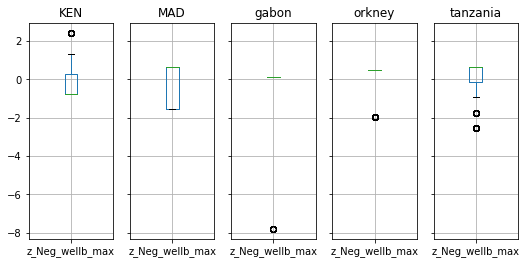

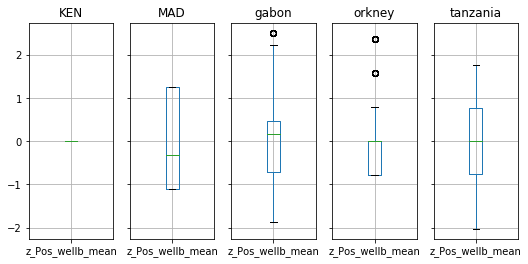

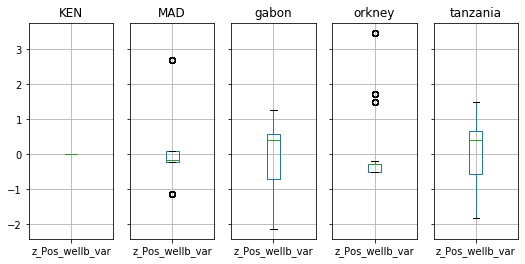

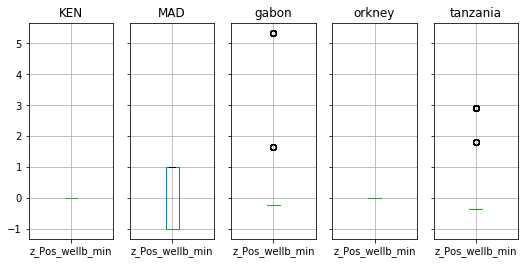

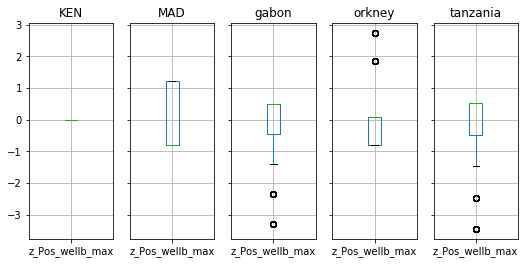

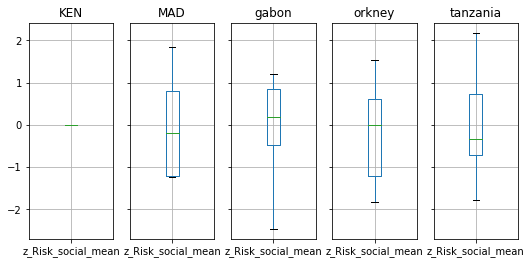

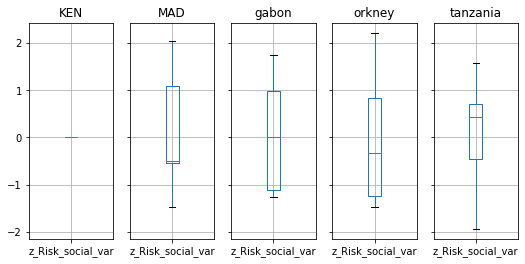

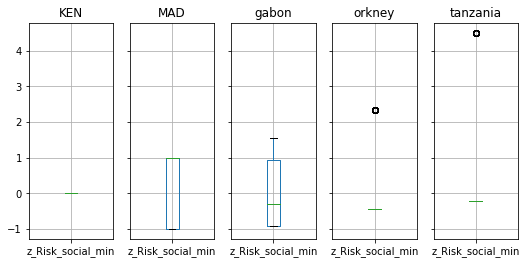

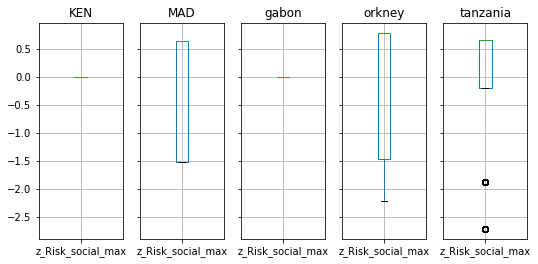

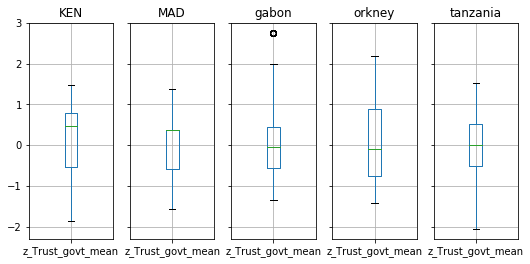

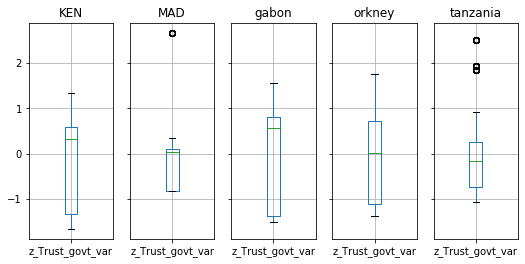

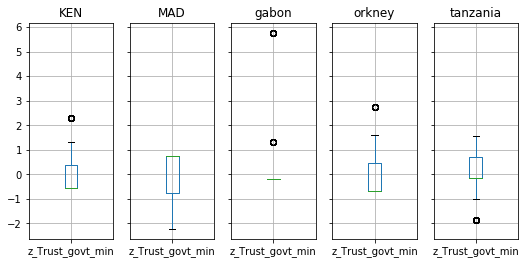

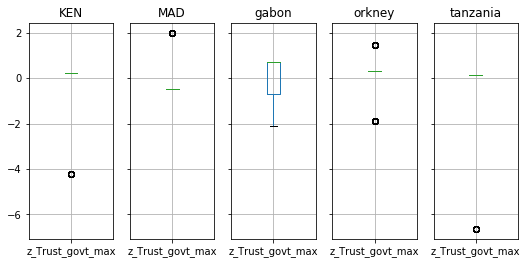

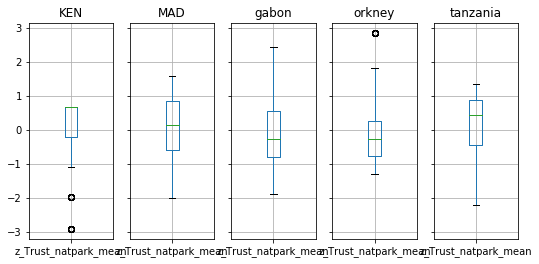

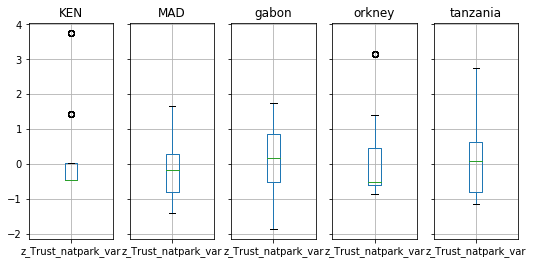

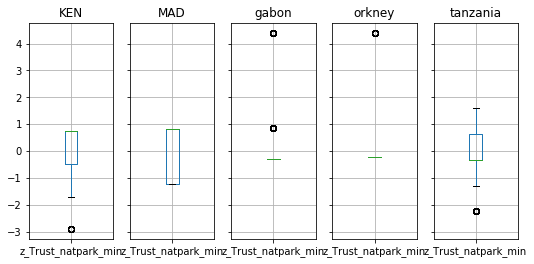

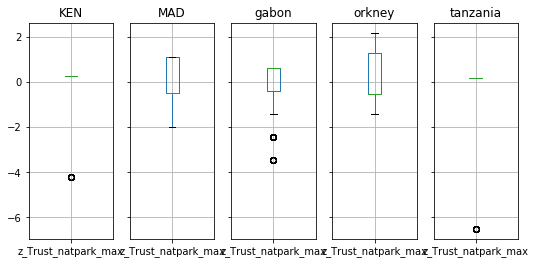

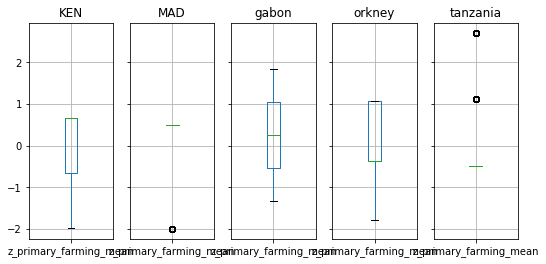

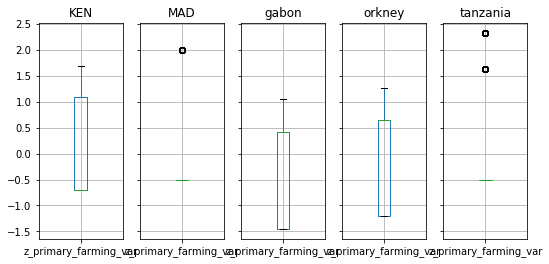

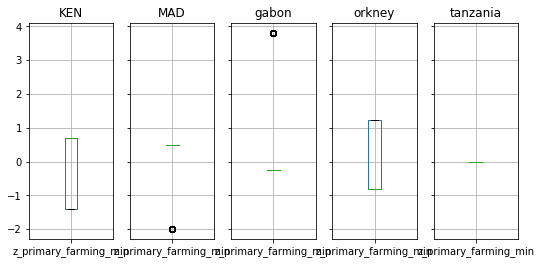

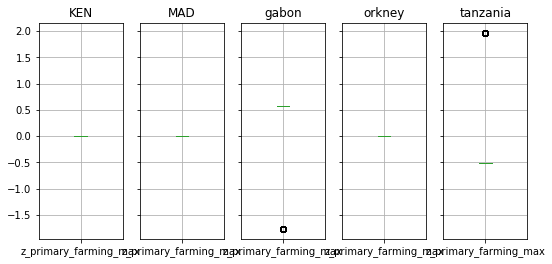

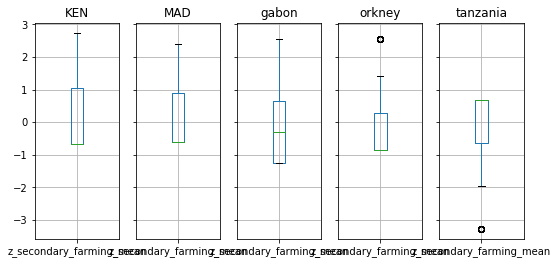

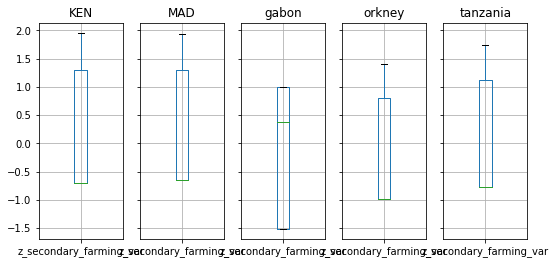

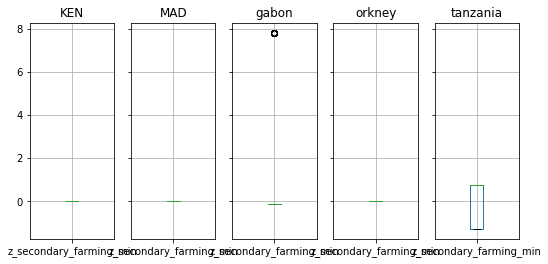

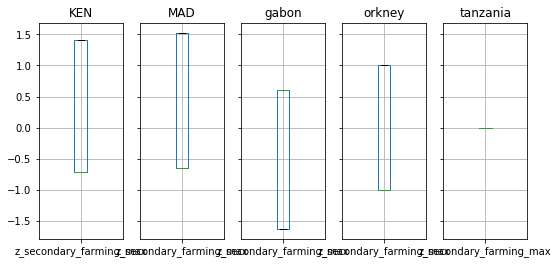

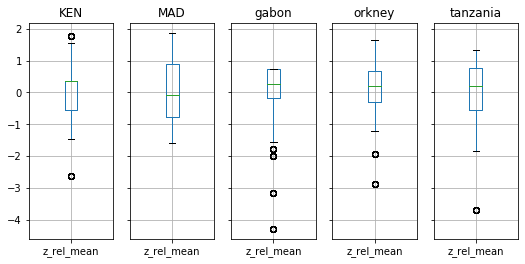

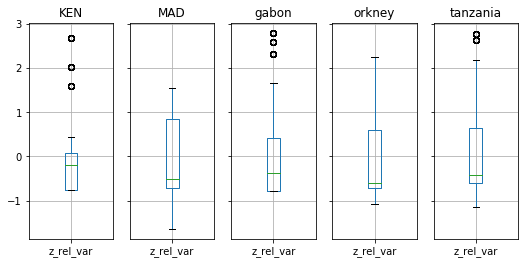

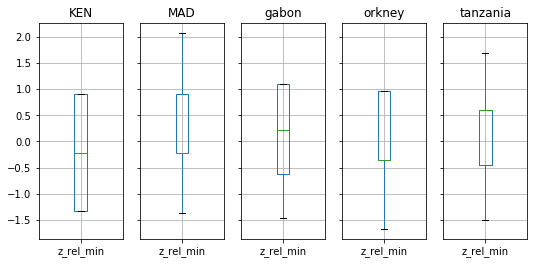

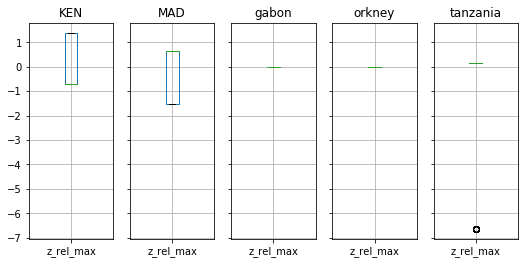

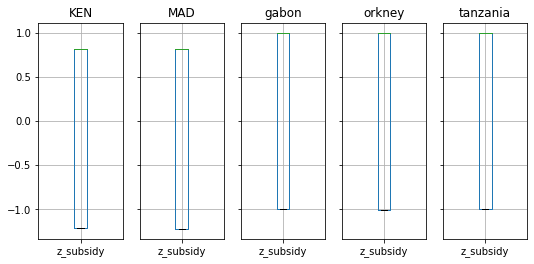

In [26]:
for var in explanatory_var:
    data[[var, 'country']].groupby('country').boxplot(figsize=(12,4), layout=(1,7))
    plt.savefig('country_'+var+'.png')
    plt.show()

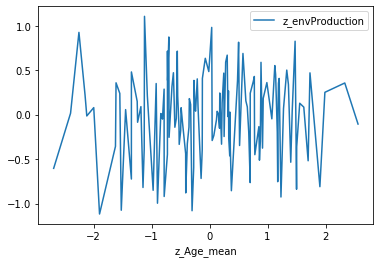

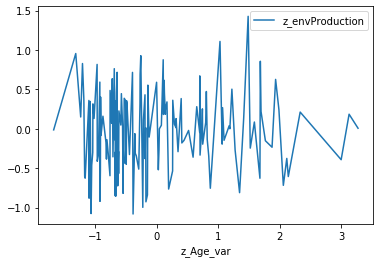

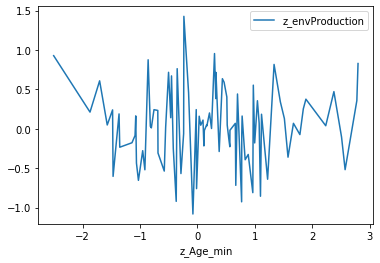

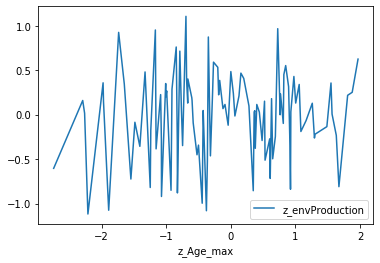

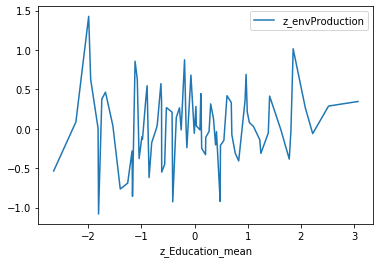

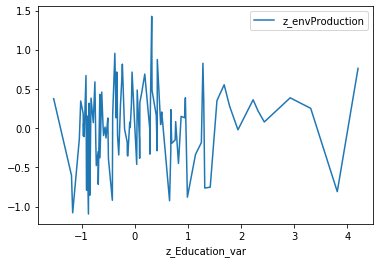

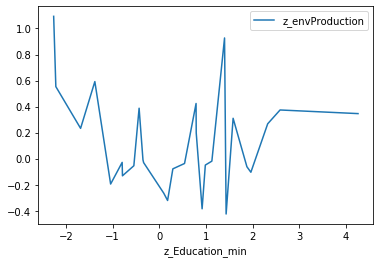

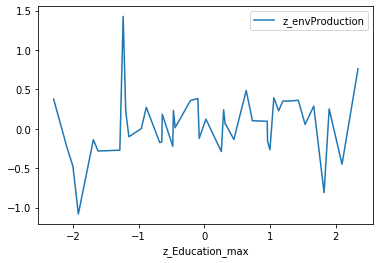

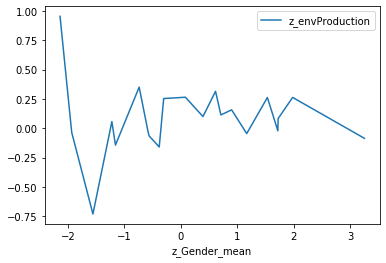

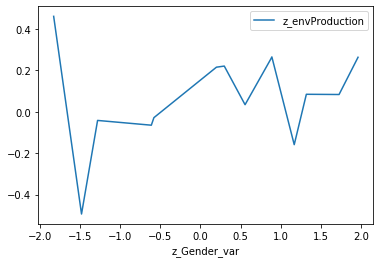

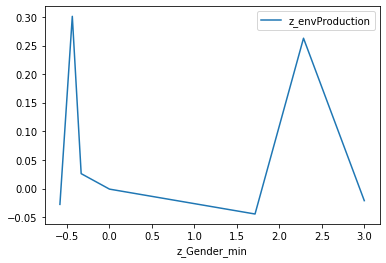

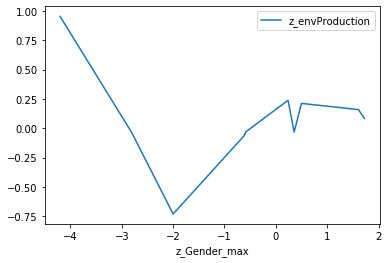

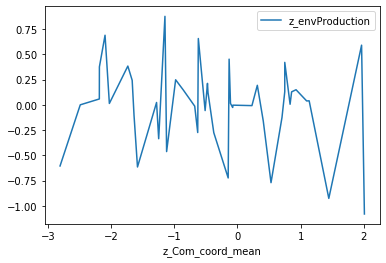

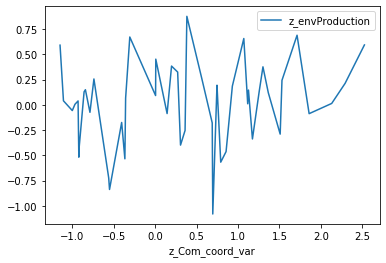

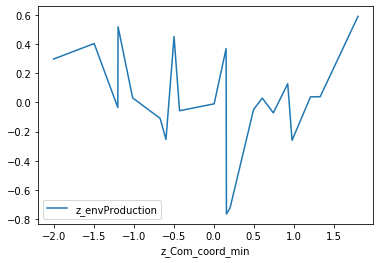

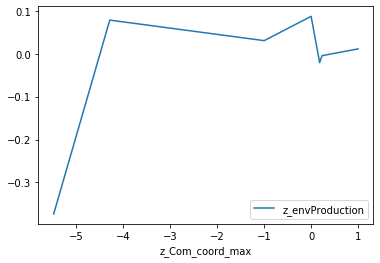

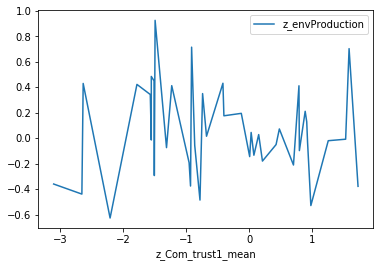

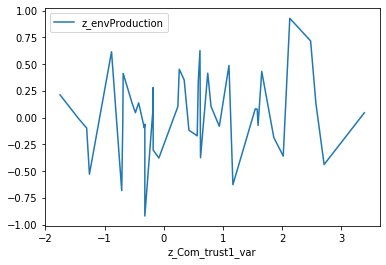

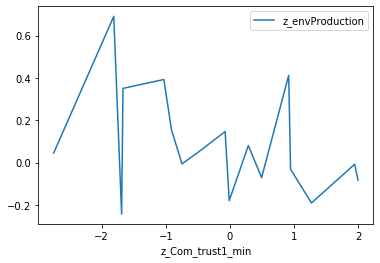

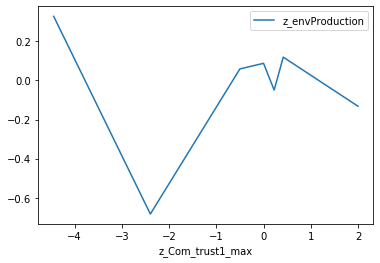

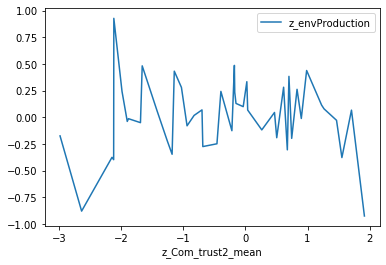

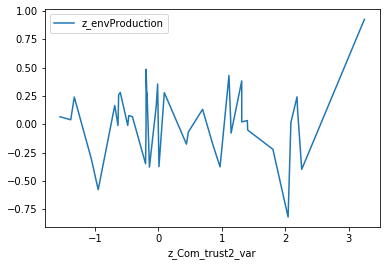

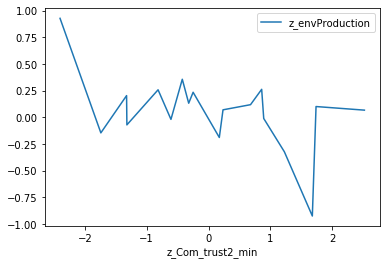

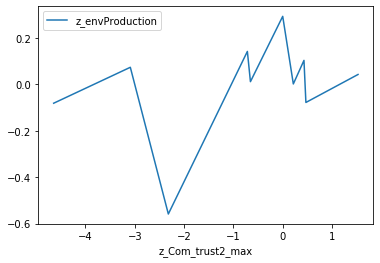

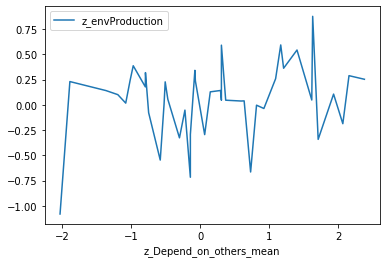

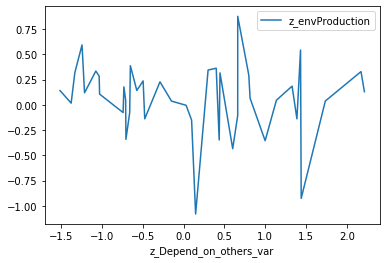

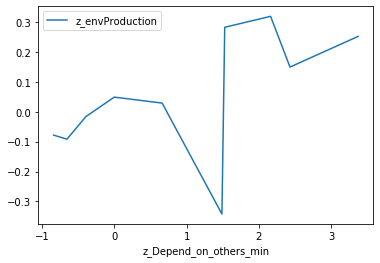

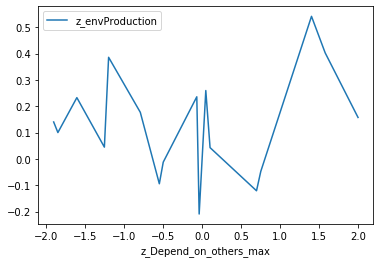

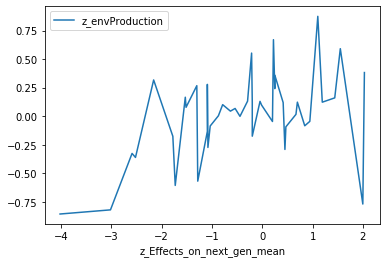

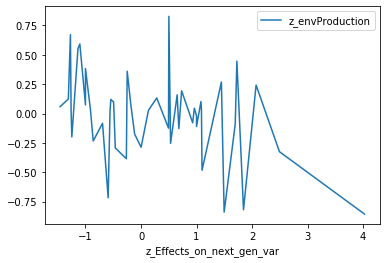

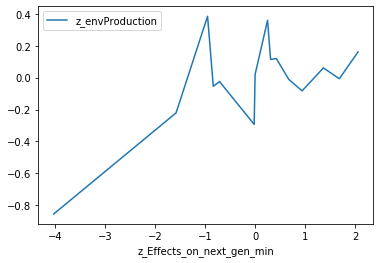

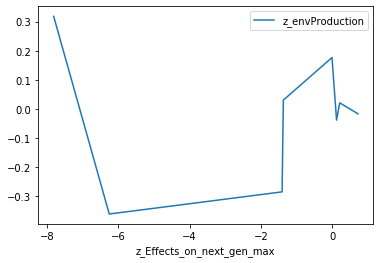

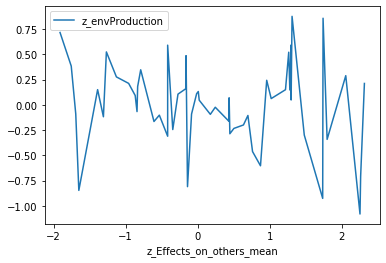

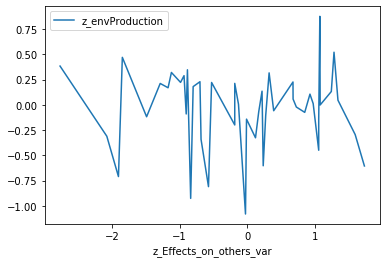

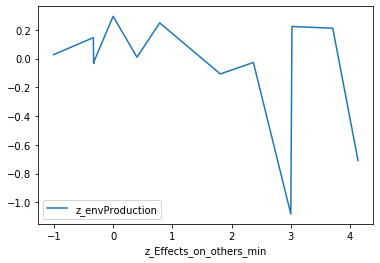

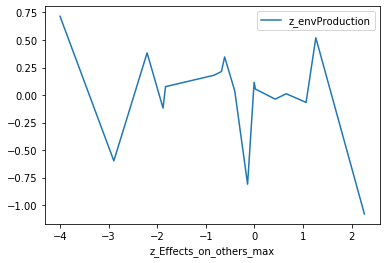

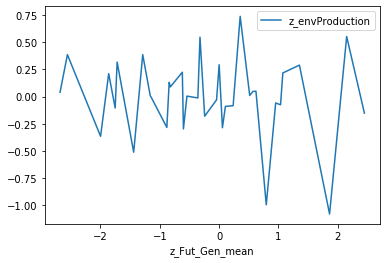

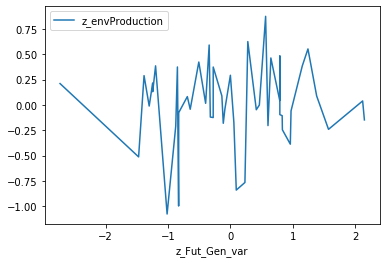

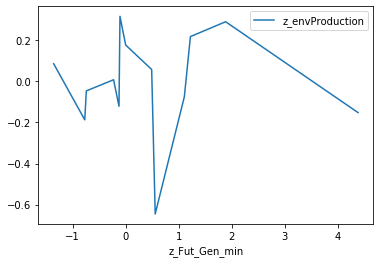

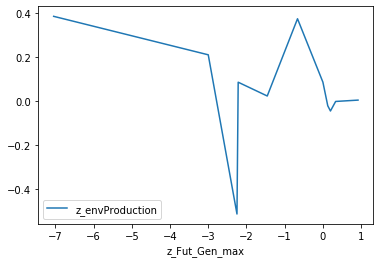

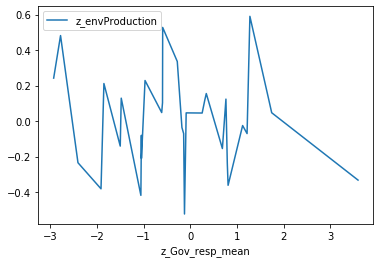

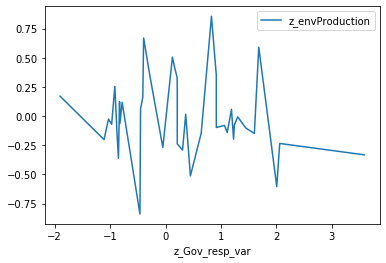

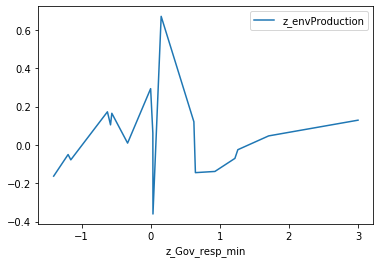

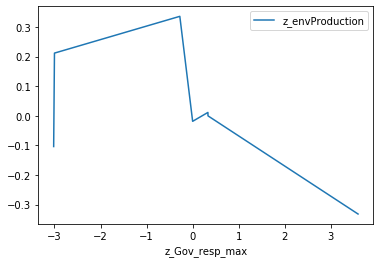

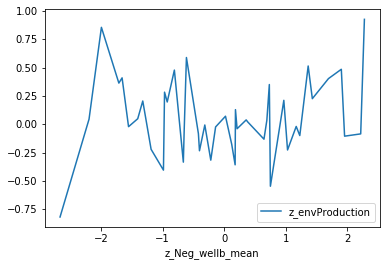

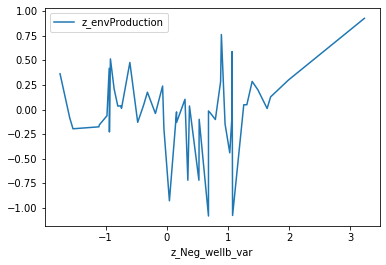

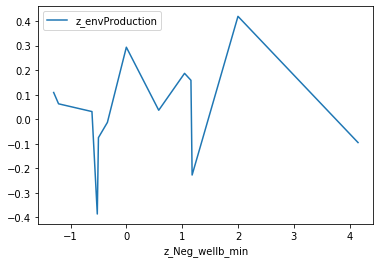

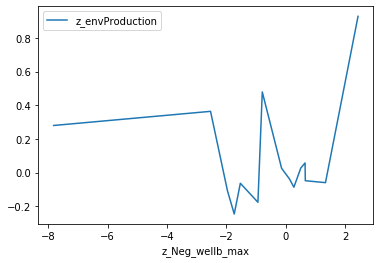

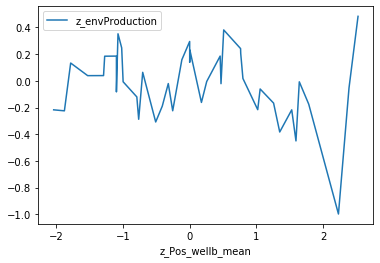

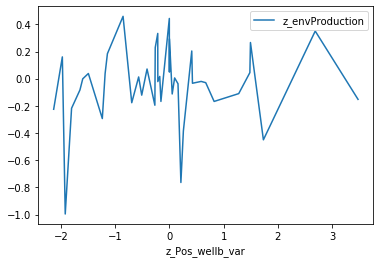

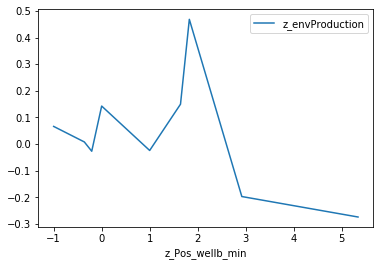

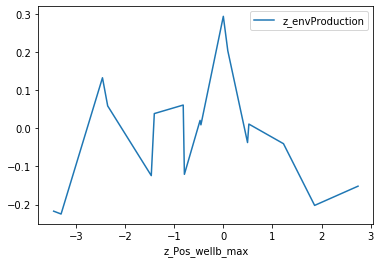

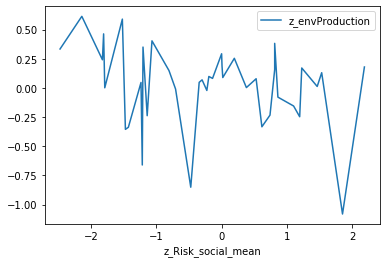

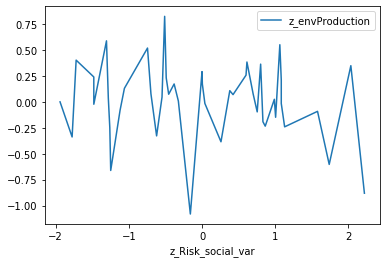

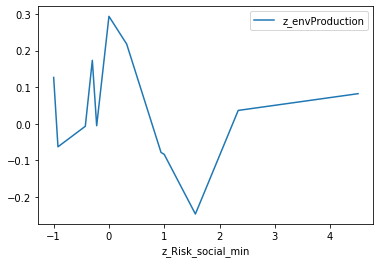

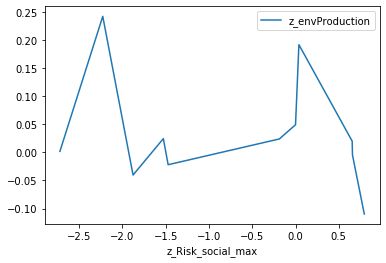

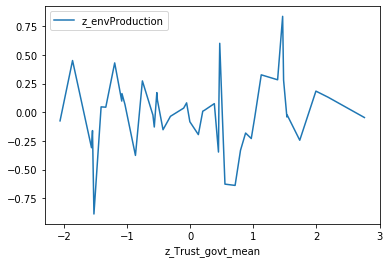

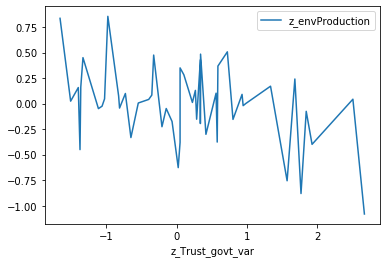

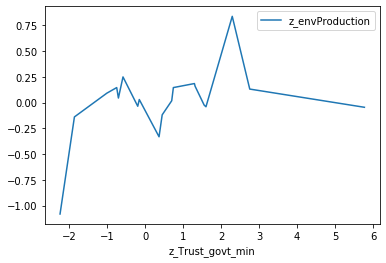

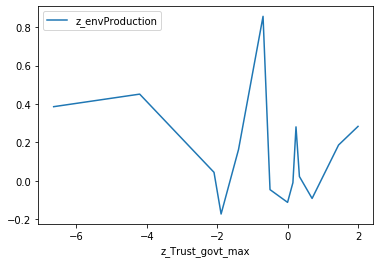

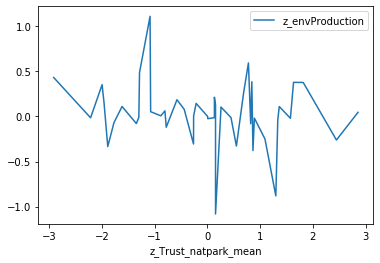

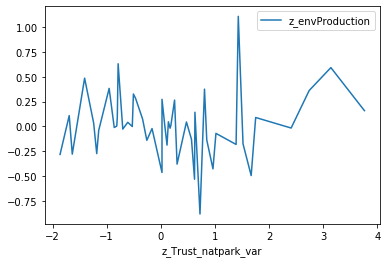

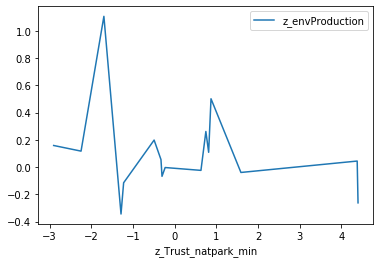

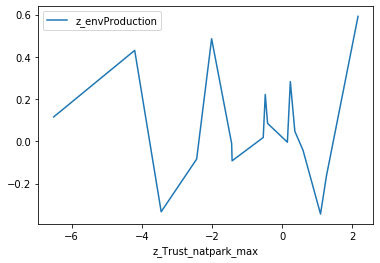

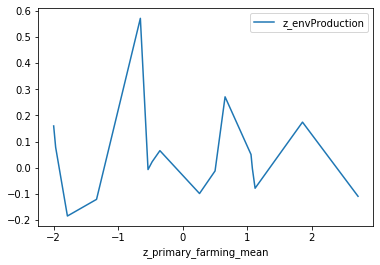

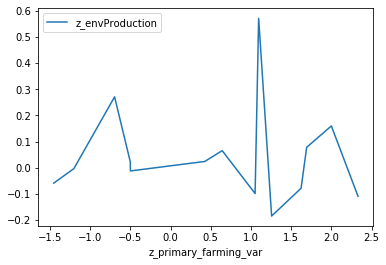

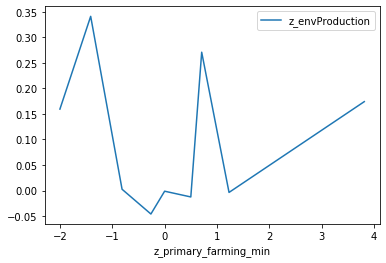

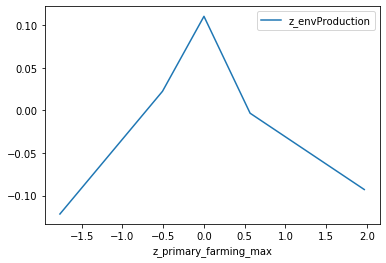

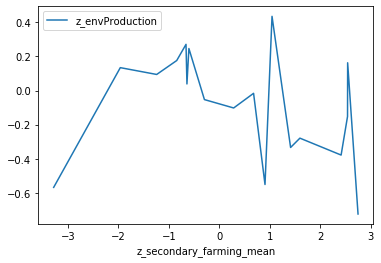

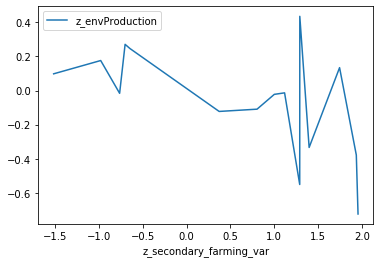

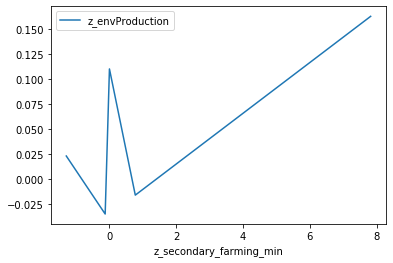

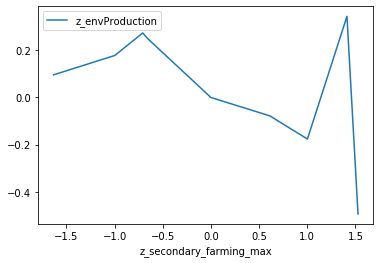

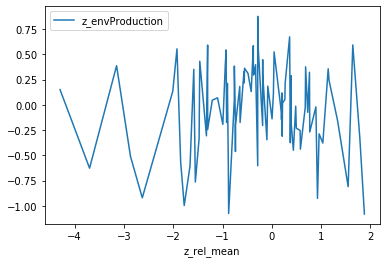

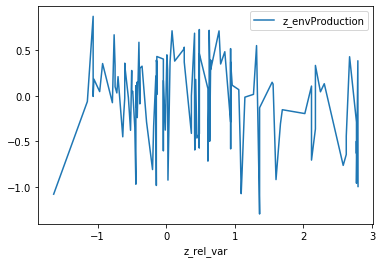

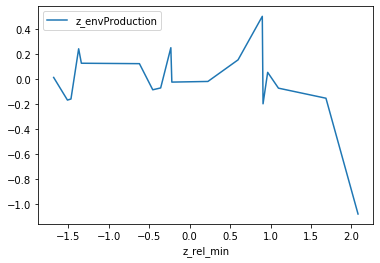

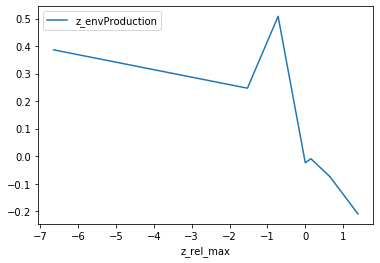

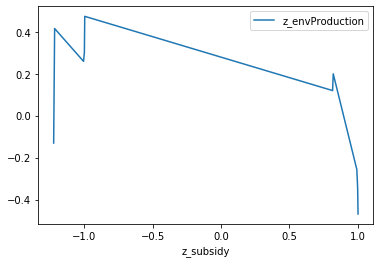

In [27]:
for var in explanatory_var:
    data[[var, 'z_envProduction']].groupby(var).mean().plot()
    plt.savefig('envprod_'+var+'.png')
    plt.show()

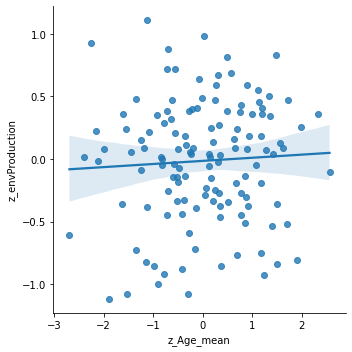

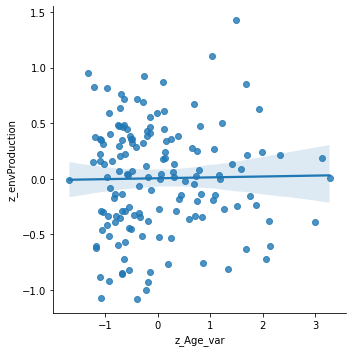

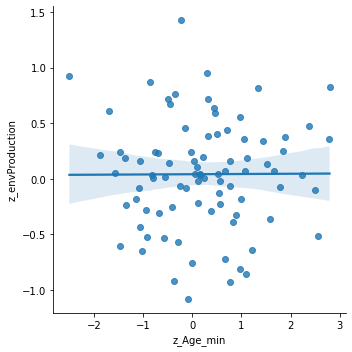

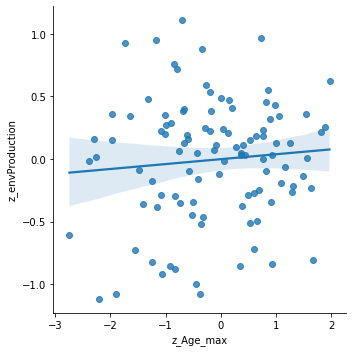

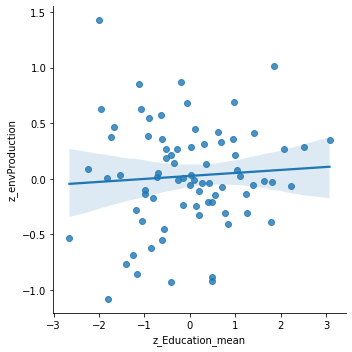

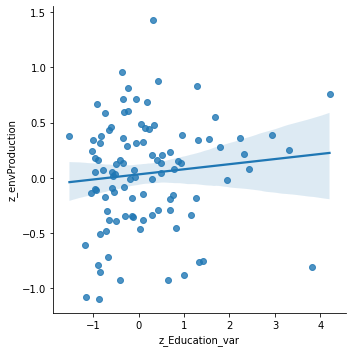

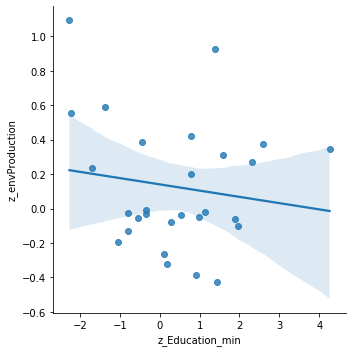

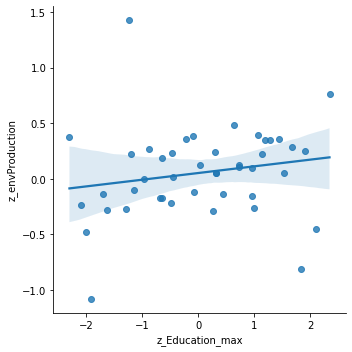

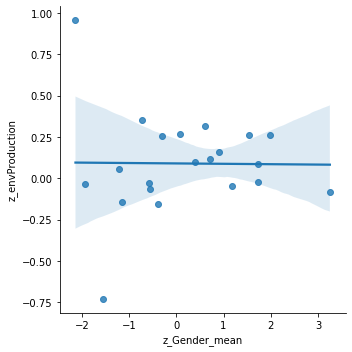

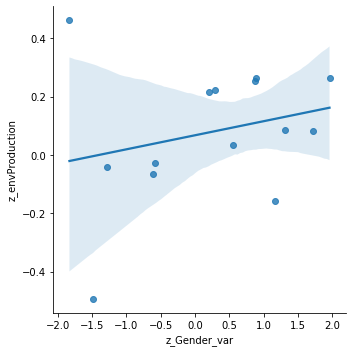

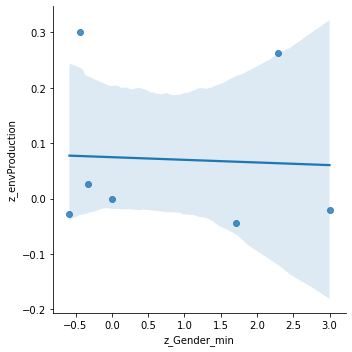

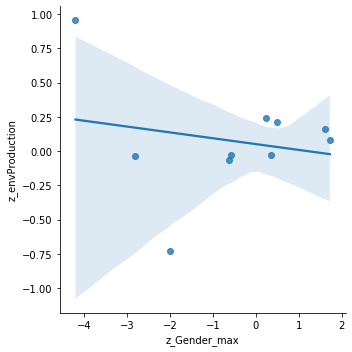

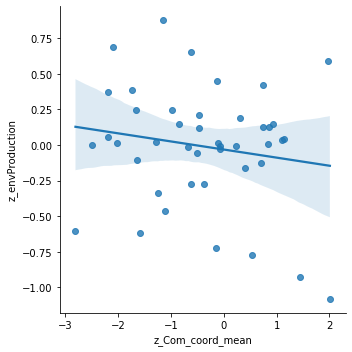

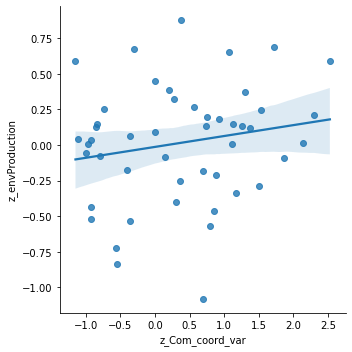

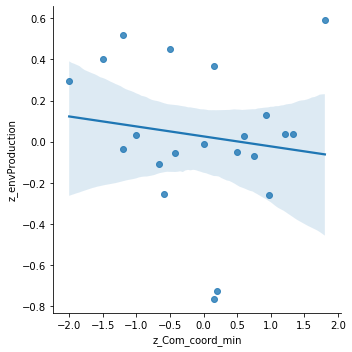

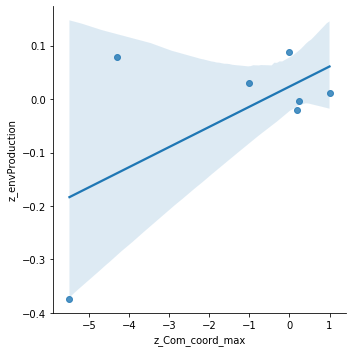

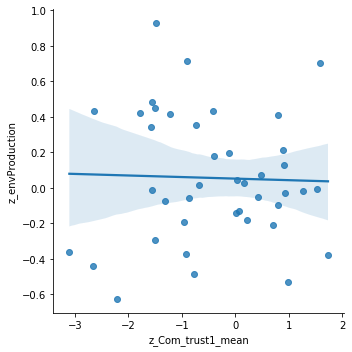

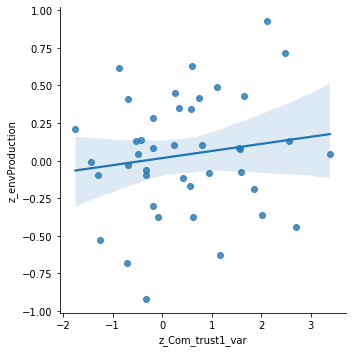

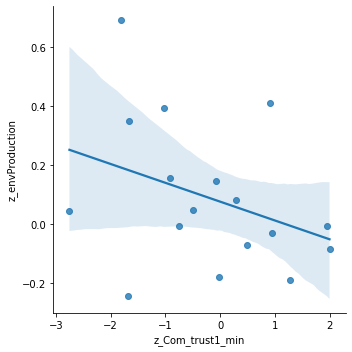

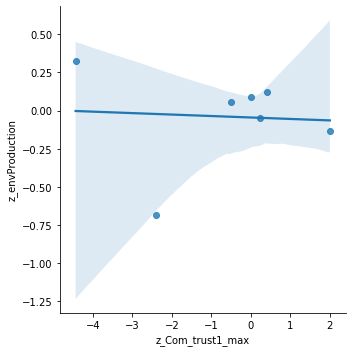

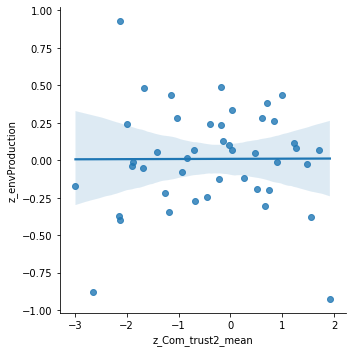

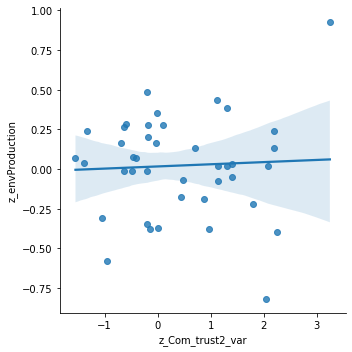

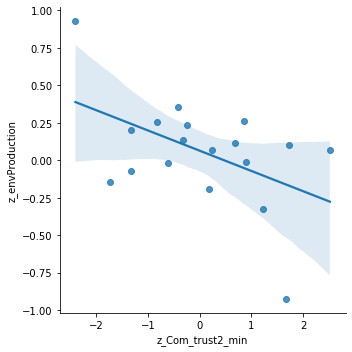

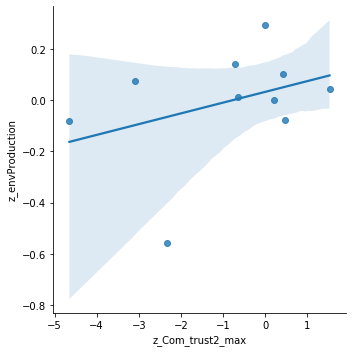

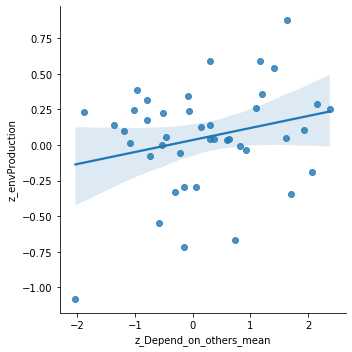

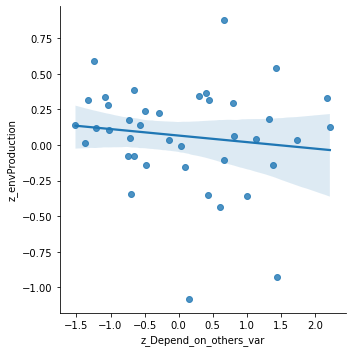

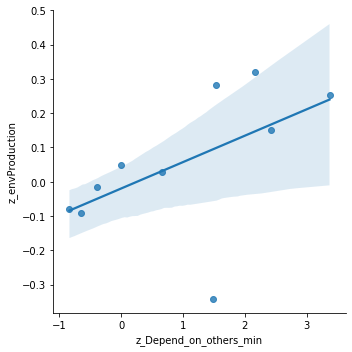

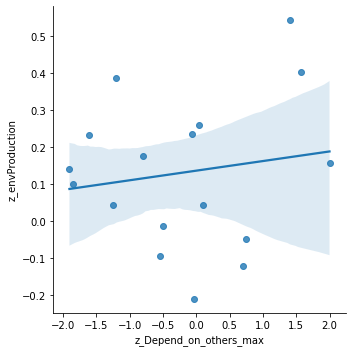

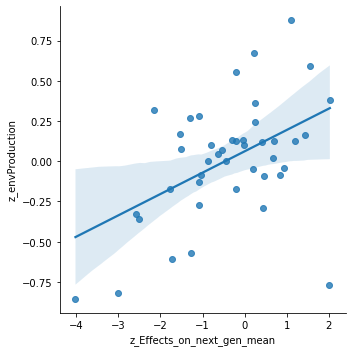

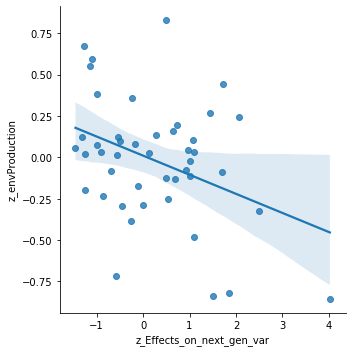

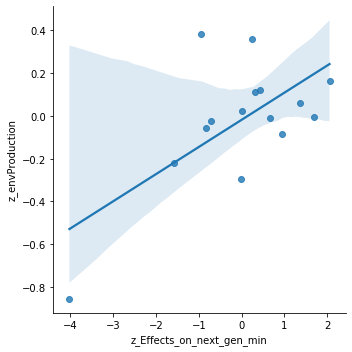

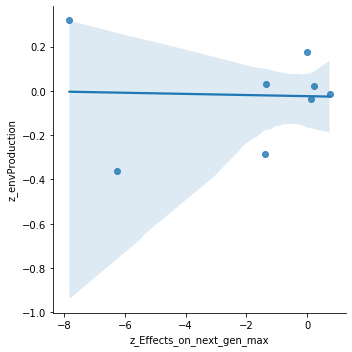

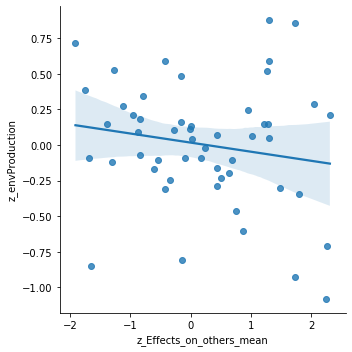

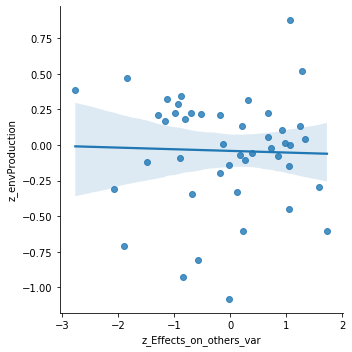

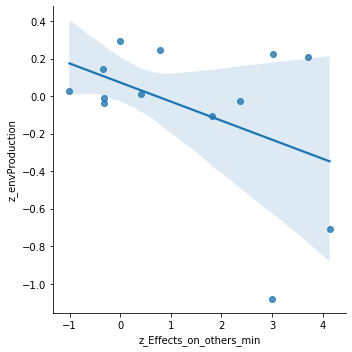

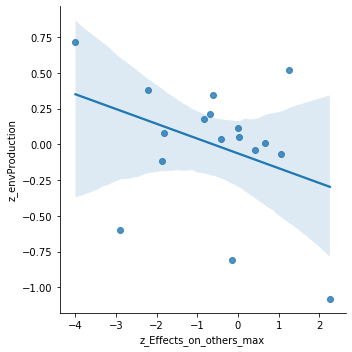

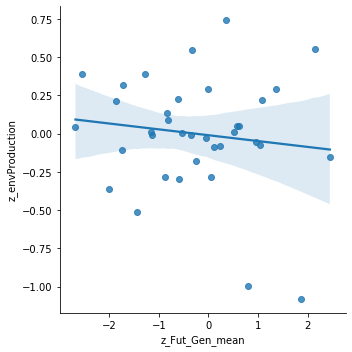

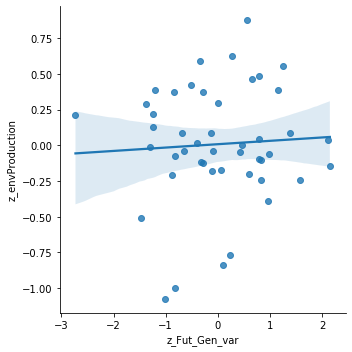

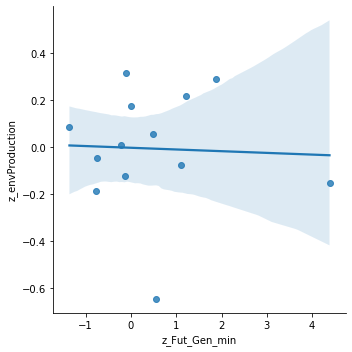

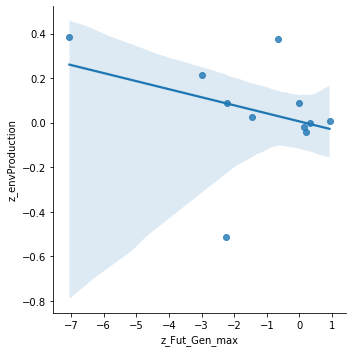

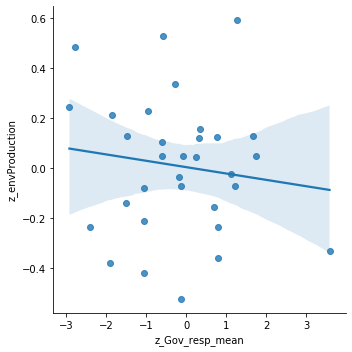

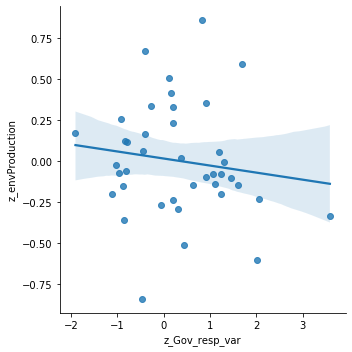

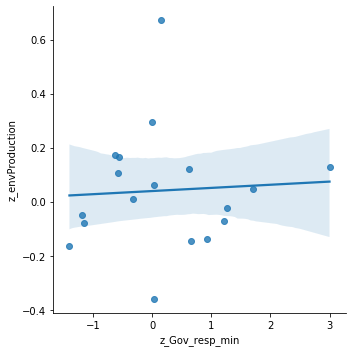

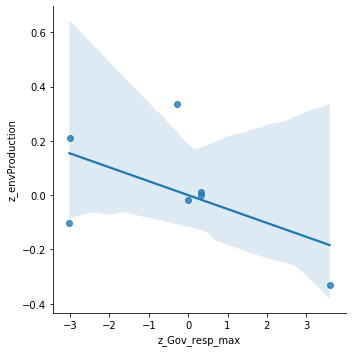

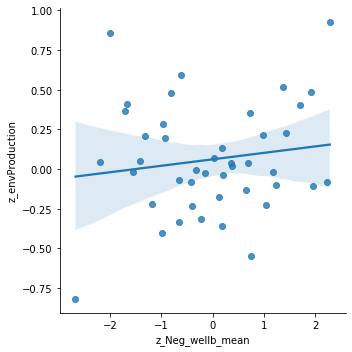

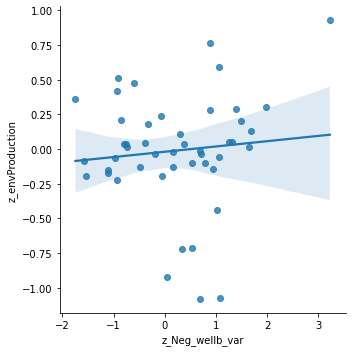

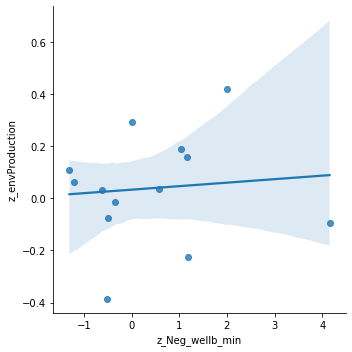

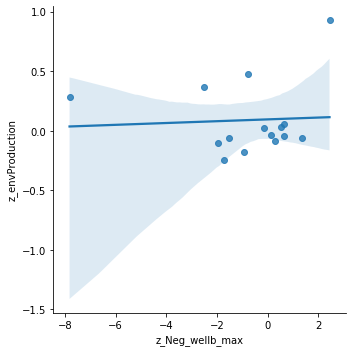

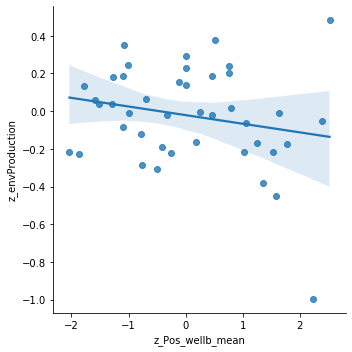

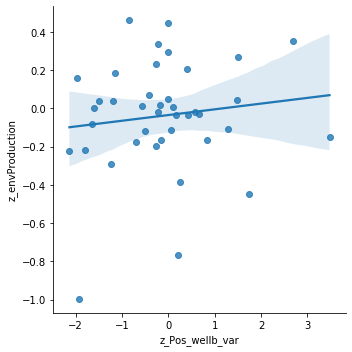

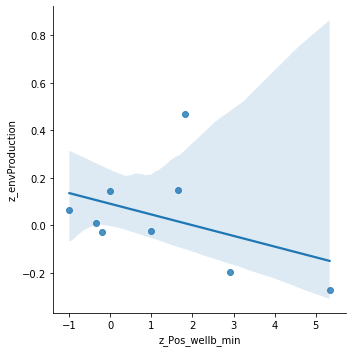

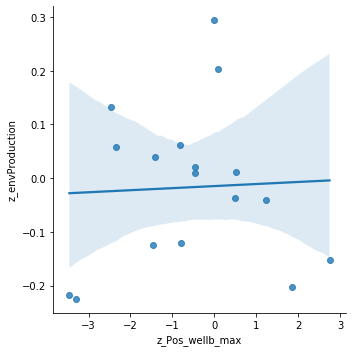

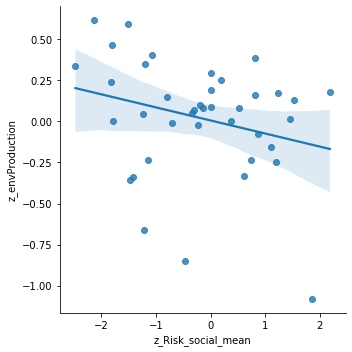

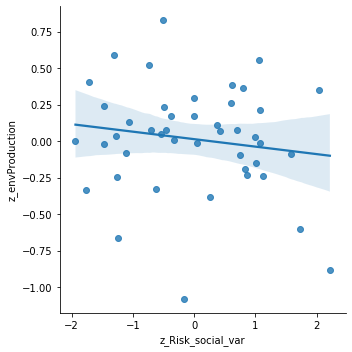

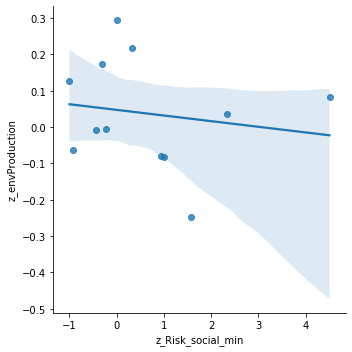

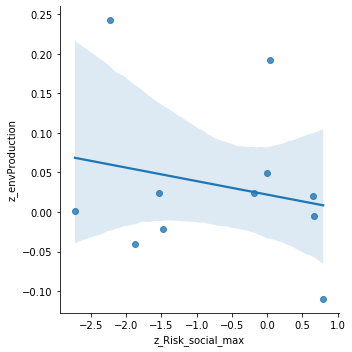

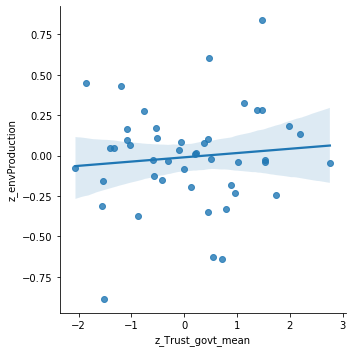

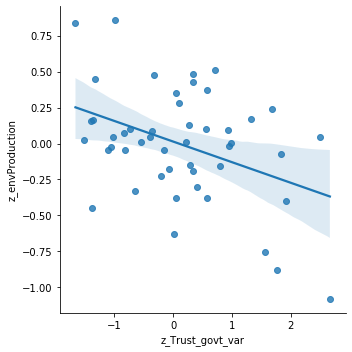

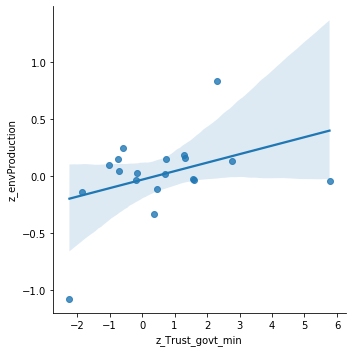

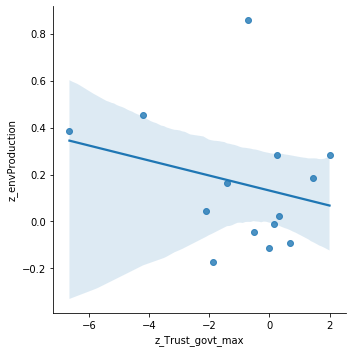

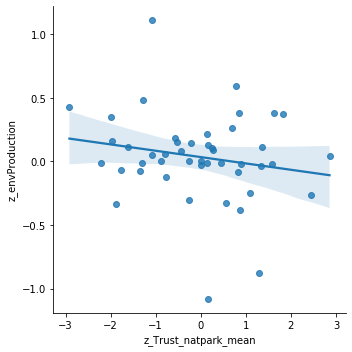

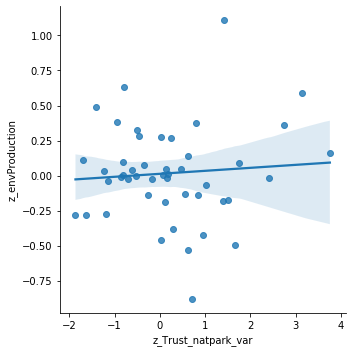

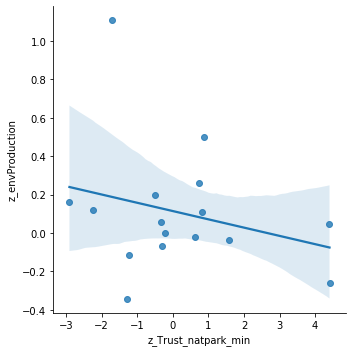

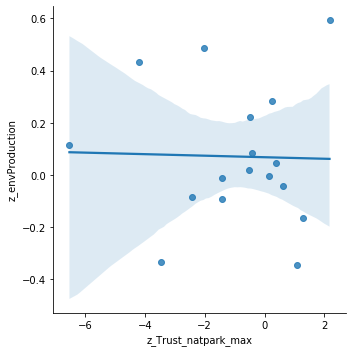

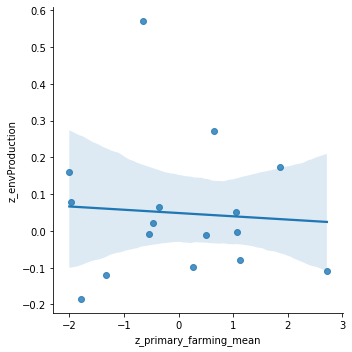

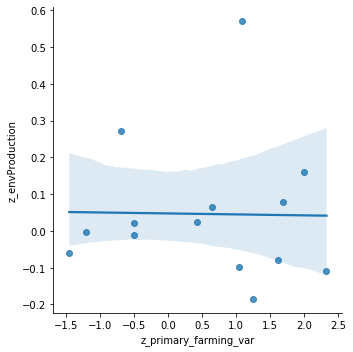

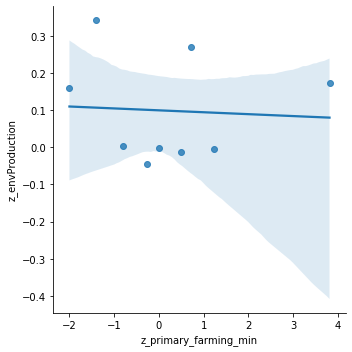

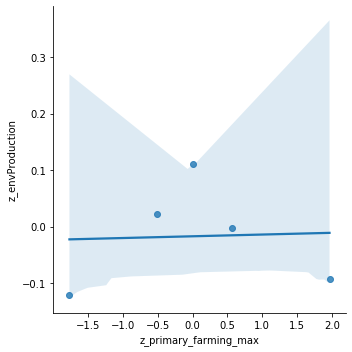

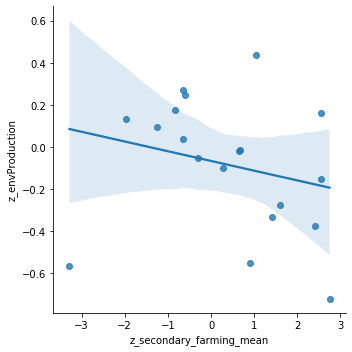

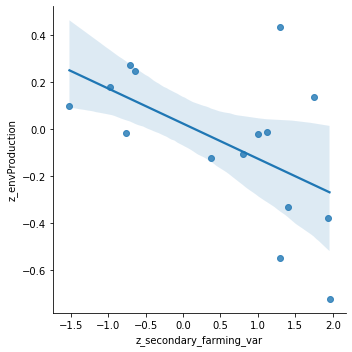

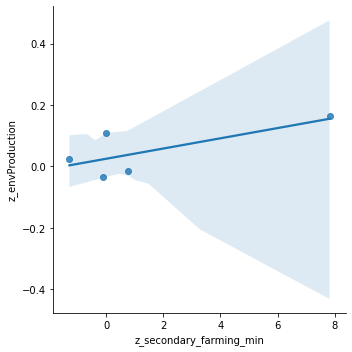

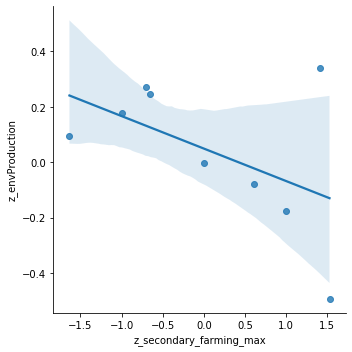

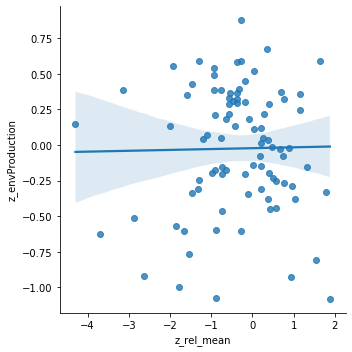

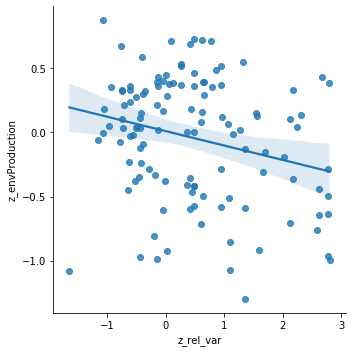

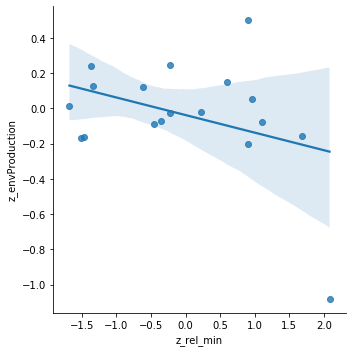

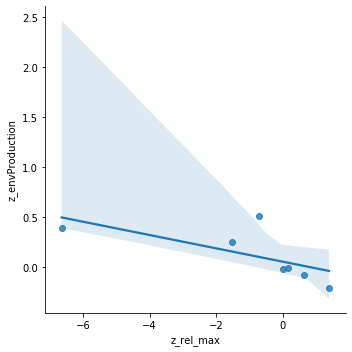

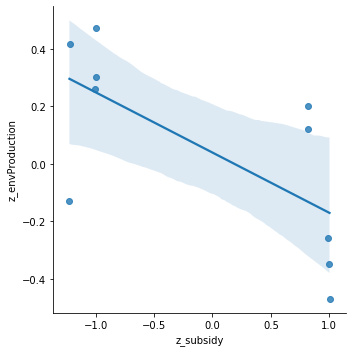

In [28]:
for var in explanatory_var:
    df = data[[var, 'z_envProduction']].groupby(var).mean().reset_index()
    sns.lmplot(x=var, y='z_envProduction', data=df, fit_reg=True) 
    plt.savefig('envprod_'+var+'.png')
    plt.show()